## Table of Content

1. Introduction
2. Data Import
3. Data Transformation and Exploration
4. Methodology Overview
5. Model Training & Validation
6. Results
7. Final Prediction on Test Set
8. References

## 1. Introduction 

This report aims to predict the probability the client will default on their credit card. Different model classifiers are used in this report such as, K-Nearest Neighbours (KNN), Neural Network (NN), Linear Discriminant Analysis (LDA), Naive Bayes (NB) and Logistic Regression (LR). Prior to the model development, the dataset has been preprocessed to remove any redundancies or noises and analysed to understand the nature of the dataset better. In this model, multiple resampling techniques have been tested and the one with desired performance are used to account for imbalance dataset, such as oversampling(SMOTE), undersampling (RandomSampler) and the combination of both oversampling and undersampling (SMOTE-ENN). PCA method has been introduced as well to reduce the dimension of the dataset to increase the computational efficiency and remove redundancy or unnecessary noise. As for the evaluation metrics, confusion matrix, accuracy, precision, f1-score, ROC-AUC, recall score as well as ROC Curve has been used

## 2. Data Import

In [1]:
# Import relevant libraries from environment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
import sklearn.model_selection as curves
from time import time
import os
# print(os.listdir("../input"))
from IPython.display import display
# Any results you write to the current directory are saved as output.

In [2]:
# Load dataset
dataset = pd.read_csv('CreditCard_train.csv')

## 3(a). Data Transformation

In [3]:
# Extract some basic information regarding the dataset (columns and rows information) and examine its dimensions
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
# observe the first 10 rows of all column
dataset.head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
# Checking the last few entries of dataset to see the distribution of data
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
23995,23996,80000,1,2,1,25,1,2,2,0,...,80215,63296,49854,3800,6,3636,2646,2000,1830,0
23996,23997,20000,1,2,1,25,0,0,0,0,...,17322,17119,17350,1552,2659,1419,606,500,1000,0
23997,23998,10000,1,2,2,26,0,0,0,0,...,17506,16608,9176,1300,2200,1300,320,1820,1000,0
23998,23999,20000,1,5,2,26,0,0,0,0,...,39950,0,0,3055,1467,1096,1000,0,0,0
23999,24000,100000,1,1,2,26,0,-1,0,0,...,1944,389,1221,1100,1200,1000,500,1000,1000,1


In [6]:
# Examine the dimension of the dataset
dataset.shape

(24000, 25)

In [7]:
# Checking the object type of all the columns to see if there is not a object type mismatch in any column 
print(dataset.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [8]:
#Checking the number of Null entries in the data columnwise.
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
# Simplify the PAY_X (X=1,2,....6) columns by integrating them into one single column for better understanding purpose
pay_X = dataset[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_combined = pd.melt(pay_X)
print(pay_combined['value'].value_counts())

# There are two unexplained integer: {0, -2} after the simplification, which require further investigation

 0    76507
-1    28059
-2    18975
 2    15527
 1     3020
 3     1168
 4      369
 7      182
 5      104
 6       63
 8       26
Name: value, dtype: int64


In [10]:
# Check column names, columan data type and identify any missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          24000 non-null  int64
 1   LIMIT_BAL                   24000 non-null  int64
 2   SEX                         24000 non-null  int64
 3   EDUCATION                   24000 non-null  int64
 4   MARRIAGE                    24000 non-null  int64
 5   AGE                         24000 non-null  int64
 6   PAY_0                       24000 non-null  int64
 7   PAY_2                       24000 non-null  int64
 8   PAY_3                       24000 non-null  int64
 9   PAY_4                       24000 non-null  int64
 10  PAY_5                       24000 non-null  int64
 11  PAY_6                       24000 non-null  int64
 12  BILL_AMT1                   24000 non-null  int64
 13  BILL_AMT2                   24000 non-null  int64
 14  BILL_A

In [11]:
# Change inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NMO'
dataset.rename(columns={'PAY_0':'PAY_1','default payment next month':'DPNM'},inplace = True)
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DPNM'],
      dtype='object')

In [12]:
# Check if there is any duplicate records exist in the dataset
condition = bool(dataset.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


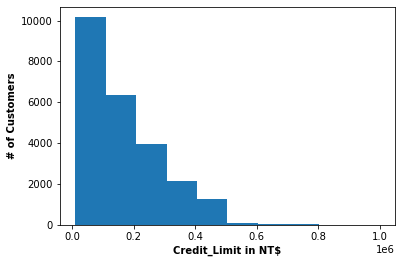

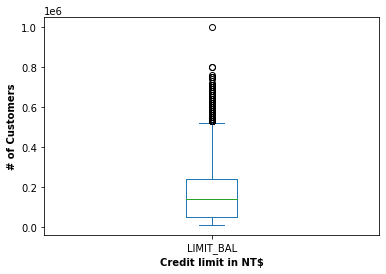

In [13]:
# Use histogram to view the distribution of credit limit and boxplot to identify any outliers 

plt.hist(dataset["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()


dataset["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [14]:
# Extract the outlier data profile and observe closely
outliers = dataset.loc[dataset['LIMIT_BAL']>900000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


In [15]:
# Study the statistic summary of the columns and perform a sense check on the dataset
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000
mean,12000.500000,165495.986667,1.628250,1.847417,1.55725,35.380458,-0.003125,-0.12350,-0.154750,-0.211667,...,42368.188417,40000.682542,38563.710625,5542.912917,5.815336e+03,4969.26600,4743.480042,4783.486042,5189.399042,0.223750
std,6928.347566,129128.744855,0.483282,0.780007,0.52208,9.271050,1.123425,1.20058,1.204033,1.166549,...,63070.680934,60345.012766,59155.759799,15068.576072,2.079703e+04,16095.61434,14883.269990,15270.405279,17630.371990,0.416765
min,1.000000,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.00000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,6000.750000,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.00000,-1.000000,-1.000000,...,2340.000000,1740.000000,1234.750000,1000.000000,8.000000e+02,379.00000,279.750000,244.000000,60.750000,0.000000
50%,12000.500000,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.00000,0.000000,0.000000,...,18940.500000,18107.500000,17036.000000,2100.000000,2.000000e+03,1702.50000,1500.000000,1500.000000,1500.000000,0.000000
75%,18000.250000,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.00000,0.000000,0.000000,...,52188.500000,49746.500000,48796.250000,5000.000000,5.000000e+03,4347.25000,4000.000000,4005.000000,4000.000000,0.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,8.00000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000,1.000000


In [16]:
# Get SEX column's distribution. 1: male; 2: female and check for any unexplained integer

dataset["SEX"].value_counts()

2    15078
1     8922
Name: SEX, dtype: int64

In [17]:
# Check on the education column for any unexplained data
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

dataset["EDUCATION"].unique()

# There is an unexplained code 0 within the dataset

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [18]:
# Get the total counts of each EDUCATION level

dataset["EDUCATION"].value_counts()

2    11360
1     8443
3     3850
5      207
4       92
6       37
0       11
Name: EDUCATION, dtype: int64

In [19]:
# Combine the data points with code: 0, 5, 6 to 4 and define 4 as 'others'
# 1=graduate school, 2=university, 3=high school, 4=others

dataset["EDUCATION"] = dataset["EDUCATION"].replace({0:4,5:4,6:4})
dataset["EDUCATION"].value_counts()

2    11360
1     8443
3     3850
4      347
Name: EDUCATION, dtype: int64

In [20]:
# Examine the marriage column to check for any unexplained data points
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others)

dataset["MARRIAGE"].unique()

# There is also an unexplained data code: 0

array([1, 2, 3, 0], dtype=int64)

In [21]:
# How many customers had "MARRIAGE" status as 0?

dataset["MARRIAGE"].value_counts(normalize=True)

# very little customers had 0 as their "MARRIAGE" status

2    0.536542
1    0.450542
3    0.011208
0    0.001708
Name: MARRIAGE, dtype: float64

In [22]:
# Combine 0 and 3 by changing the value 0 into 3

dataset["MARRIAGE"] = dataset["MARRIAGE"].replace({0:3})
dataset["MARRIAGE"].value_counts(normalize=True)
print(dataset.head(5))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DPNM  
0         0         0         0     1  
1     

In [23]:
# Save processed csv file for backup file

dataset.to_csv("UCI_Credit_Card_Processed.csv", index=None)

## 3(b). Data Analysis & Exploratory

In [24]:
# Change sex code to 'F' and 'M' and use category as datatype

dataset["SEX"]=dataset["SEX"].map({1:'M',2:'F'}).astype('category')
dataset["SEX"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [25]:
# Set ID as dataframe index

dataset.set_index('ID', inplace = True)
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,F,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,F,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,F,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,M,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=dataset['DPNM'],columns = dataset[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

Text(0.5, 1.0, 'Credit Card Default Counts')

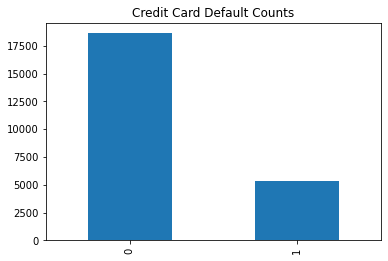

In [27]:
# compute the count of default payment next month 

pd.value_counts(dataset['DPNM']).plot.bar()
plt.title("Credit Card Default Counts")

### (a) Sex

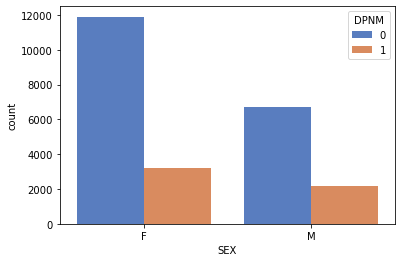

In [28]:
# Checking the number of counts of defaulters and non defaulters sexwise
g=sns.countplot(x="SEX", data=dataset,hue="DPNM", palette="muted")

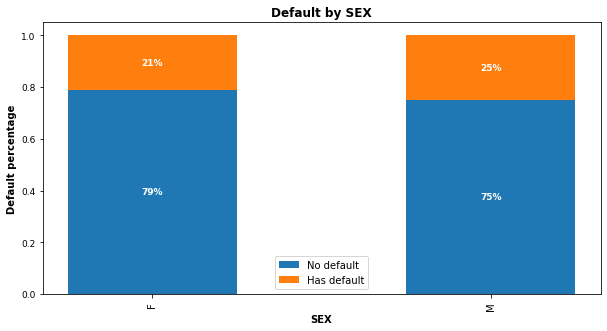

In [29]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_stacked_bar('SEX')

# 27% of female has default payment while 31% of male has default payment

### (b) Education

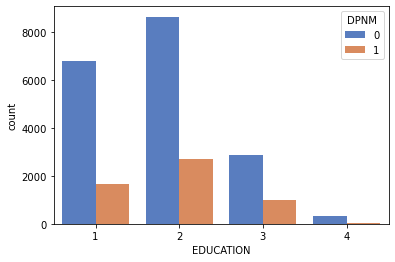

In [30]:
# Checking the number of counts within different categories under the education attribute

g=sns.countplot(x="EDUCATION", data=dataset,hue="DPNM", palette="muted")

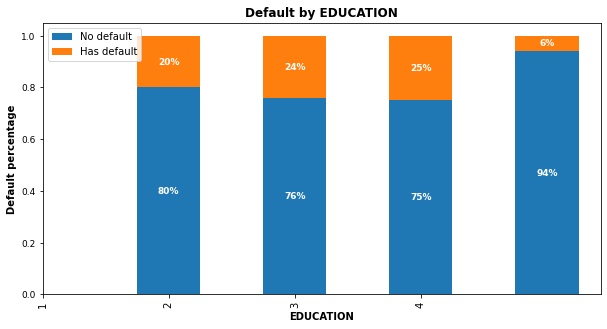

In [31]:
# Plot a stacked bar chart to show default by education level

create_stacked_bar('EDUCATION')

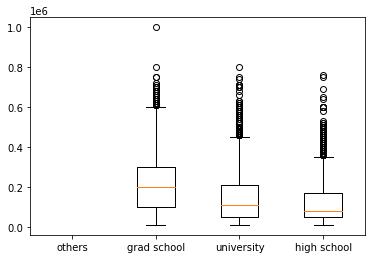

In [32]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [0,1,2,3]:
    temp = dataset.loc[dataset.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

# Customer with higher education levels did get higher credit limits

### (c) Marriage

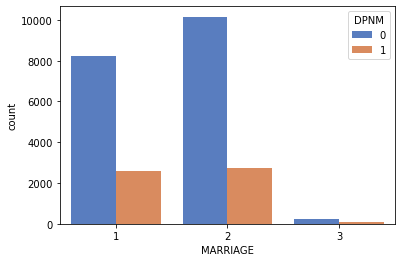

In [33]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="DPNM", palette="muted")

In [34]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

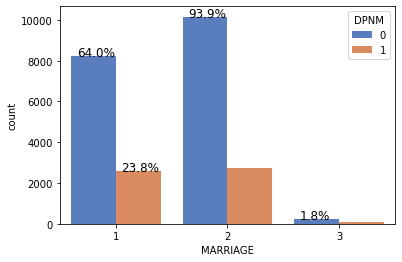

In [35]:
ax = sns.countplot(x="MARRIAGE", data=dataset,hue="DPNM", palette="muted")
with_hue(ax, dataset.MARRIAGE, 2, 2)

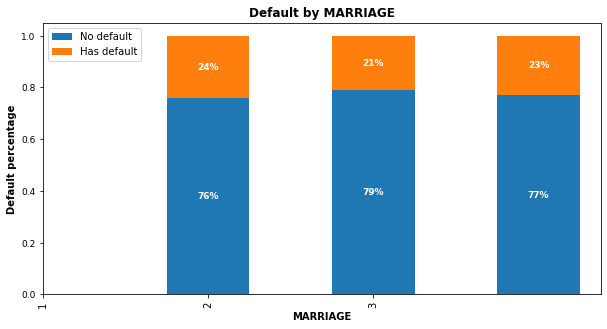

In [36]:
# Plot a stacked bar chart to visualize default and non-default distribution by marital status 

create_stacked_bar('MARRIAGE')

### (d) Age

<AxesSubplot:xlabel='DPNM', ylabel='AGE'>

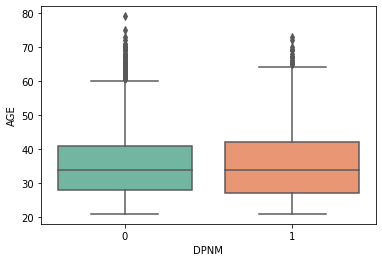

In [37]:
# Use boxplot to visualize defaulter or non-defaulter grouped by age

sns.boxplot(x='DPNM',y='AGE',data=dataset,palette='Set2')

In [38]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
dataset['AGE'] = pd.cut(dataset['AGE'],bins=bins, labels=labels,right=False)

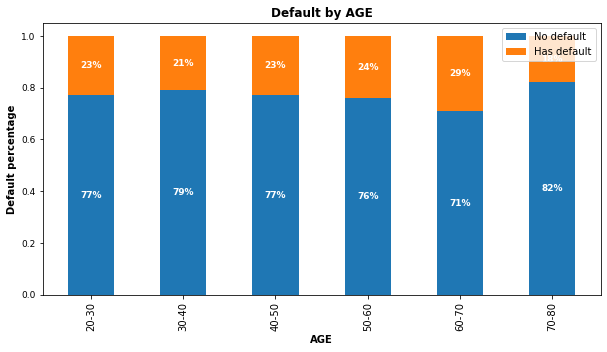

In [39]:
# Plot a stacked bar chart to visualize default and non-default by age

create_stacked_bar('AGE')

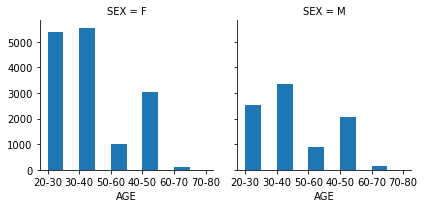

In [40]:
# Distribution of Male and Female according to their age

g = sns.FacetGrid(data=dataset,col='SEX')
g.map(plt.hist,'AGE')

### (e) Repayment Status

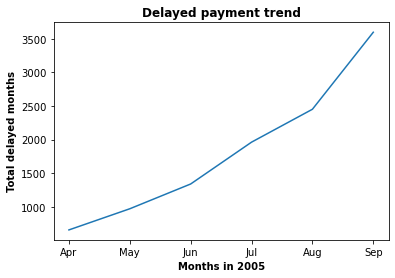

In [41]:
# Subset a dataframe with the records that have default

has_default = dataset[dataset['DPNM']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

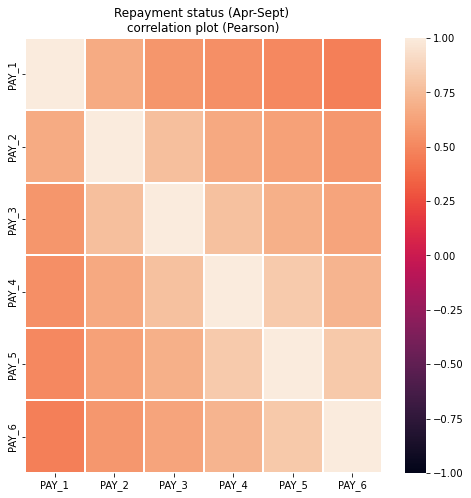

In [42]:
# Investigate how each repayment status of different months affect each other

var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = dataset[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

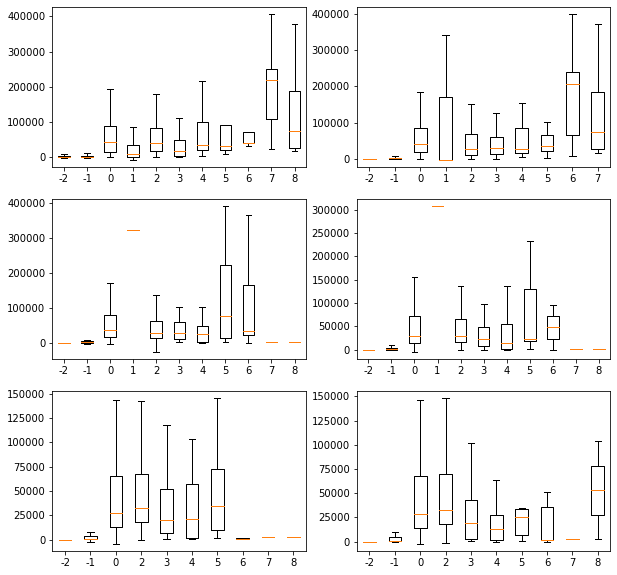

In [43]:
# Make 6 boxplots to visualize bill amounts and the total months of delayed payment

from matplotlib.pyplot import figure

# Make "PAY_1" to"PAY_6" , 'BILL_AMT1" to'BILL_AMT6" into a list respectively
pay_list = [ f"PAY_{i}" for i in range(1, 7) ]
bill_amt_list = [ f"BILL_AMT{i}" for i in range(1, 7) ]

fig, ax = plt.subplots(3,2, figsize=(10, 10))

for pay, bill_amt, myax in zip(pay_list, bill_amt_list, ax.flatten()):
    
    # Prepare data for boxploting
    data = []
    for i in sorted(has_default[pay].unique()):
        temp = has_default.loc[has_default[pay] == i, bill_amt]
        data.append(temp)
        
    # Make boxplot for each PAY variable
    myax.boxplot(data, showfliers=False,) 
    myax.set_xticklabels(sorted(has_default[pay].unique()))
    
plt.show()

### (f) Credit Limit

C:\Users\Lenovo\anaconda3\envs\Pang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


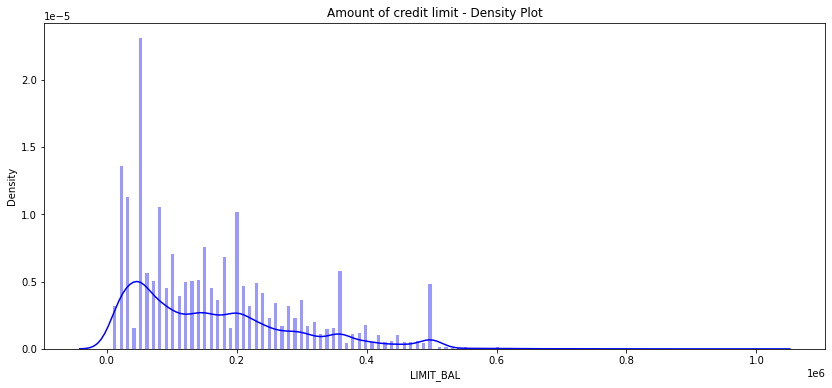

In [44]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

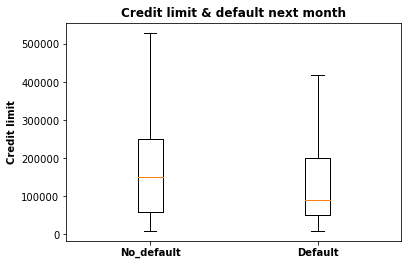

In [45]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = dataset.loc[dataset['DPNM'] == 0,'LIMIT_BAL']
def1 = dataset.loc[dataset['DPNM'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

C:\Users\Lenovo\anaconda3\envs\Pang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\envs\Pang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


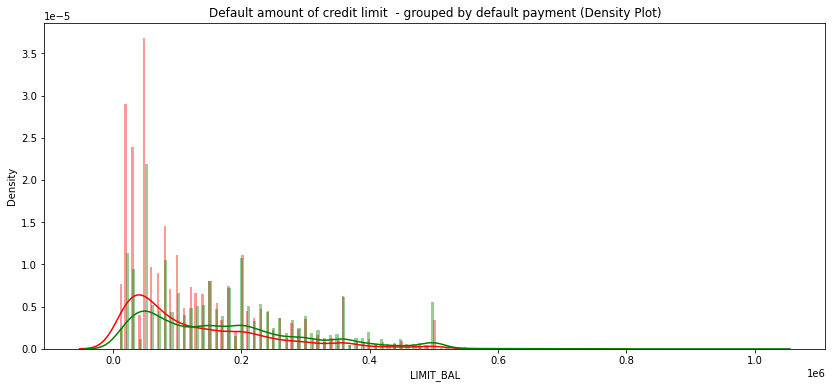

In [46]:
# Plot the relationship between credit limit and target default feature
class_0 = dataset.loc[dataset['DPNM'] == 0]["LIMIT_BAL"]
class_1 = dataset.loc[dataset['DPNM'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by default payment (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

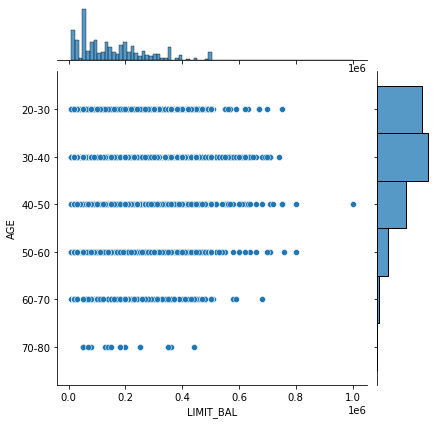

In [47]:
# plot the relationship between credit limit and different age groups
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset)

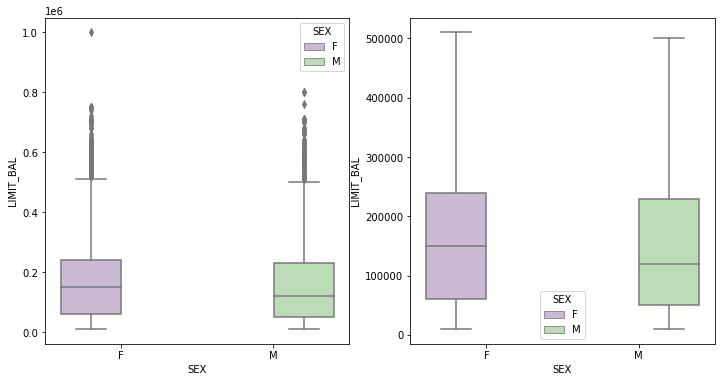

In [48]:
# compute a boxplot between credit limit and sex to understand better its relationship

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=dataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=dataset, palette="PRGn",showfliers=False)
plt.show();

### (g) Bill Statement

In [49]:
# Get statistic summary of bill statement columns to investigate unusual trend
# There are negative values in billing amount which deduced to be refund 

bill = dataset[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


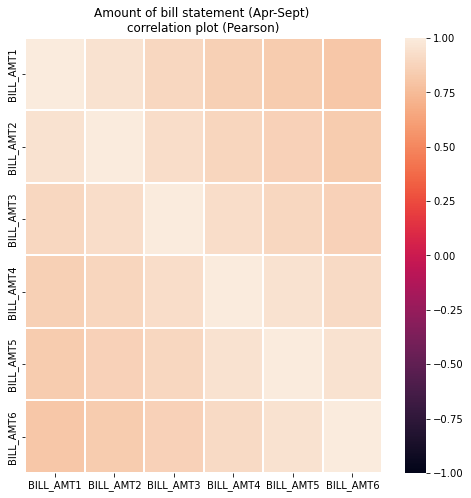

In [50]:
# Compute the correlation within the bill statement attributes

var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = dataset[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [51]:
# Compute the count of negative bills

bill_melt = pd.melt(bill, var_name = 'bill_cycle',value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount']<0]
neg_bill.groupby('bill_cycle').count()

,amount
bill_cycle,
BILL_AMT1,453
BILL_AMT2,520
BILL_AMT3,498
BILL_AMT4,517
BILL_AMT5,504
BILL_AMT6,532


In [52]:
# Compute the average amount of negative bill each month

neg_bill_mean_ndt = neg_bill.groupby('bill_cycle')['amount'].mean()

print('Average negative amounts in NTD are: \n')
print(neg_bill_mean_ndt)
print('\nAverage negative amounts in USD are: \n')
print(neg_bill_mean_ndt/30)

Average negative amounts in NTD are: 

bill_cycle
BILL_AMT1   -1312.836645
BILL_AMT2   -1209.359615
BILL_AMT3   -1537.732932
BILL_AMT4   -1608.321083
BILL_AMT5   -1597.593254
BILL_AMT6   -2826.156015
Name: amount, dtype: float64

Average negative amounts in USD are: 

bill_cycle
BILL_AMT1   -43.761221
BILL_AMT2   -40.311987
BILL_AMT3   -51.257764
BILL_AMT4   -53.610703
BILL_AMT5   -53.253108
BILL_AMT6   -94.205201
Name: amount, dtype: float64


In [53]:
# Is there any bill amount that is greater than credit limit?
# 3109 customers has greater bill statement amount than theirs credit limits

condition1 = dataset['BILL_AMT1'] > dataset['LIMIT_BAL'] 
condition2 = dataset['BILL_AMT2'] > dataset['LIMIT_BAL'] 
condition3 = dataset['BILL_AMT3'] > dataset['LIMIT_BAL'] 
condition4 = dataset['BILL_AMT4'] > dataset['LIMIT_BAL'] 
condition5 = dataset['BILL_AMT5'] > dataset['LIMIT_BAL'] 
condition6 = dataset['BILL_AMT6'] > dataset['LIMIT_BAL'] 

large_bill = dataset[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill.shape

(3109, 24)

In [54]:
# Compute the count of defaulters that have bill statement amount greater its credit limits

large_bill["DPNM"].value_counts()

0    2173
1     936
Name: DPNM, dtype: int64

In [55]:
# Is there any customer who never had any transaction, meaning bill amount in 6 months remained as 0

bill_amt = dataset[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
no_transaction = bill_amt[bill_amt.sum(axis=1) ==0]
no_transaction

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
19,0,0,0,0,0,0
20,0,0,0,0,0,0
46,0,0,0,0,0,0
80,0,0,0,0,0,0
122,0,0,0,0,0,0
...,...,...,...,...,...,...
23872,0,0,0,0,0,0
23878,0,0,0,0,0,0
23881,0,0,0,0,0,0


In [56]:
# Check its default payment next month results
# The assumption is since they did not have any consumption, they shouldn't default, so there shouldn't be any '1'
# The result shows otherwise

no_transaction_de = dataset.loc[no_transaction.index,['DPNM']]
no_transaction_de

,DPNM
ID,
19,0
20,0
46,1
80,1
122,1
...,...
23872,0
23878,0
23881,0


In [57]:
# Compute the count of inactive customers had default payment next month

no_transaction_de['DPNM'].value_counts()

0    448
1    250
Name: DPNM, dtype: int64

### (h) Payment Amount

In [58]:
# Get statistic summary of payment amount columns to investigate the hidden trend

pay = dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']]
pay.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
count,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000
mean,5542.912917,5.815336e+03,4969.26600,4743.480042,4783.486042
std,15068.576072,2.079703e+04,16095.61434,14883.269990,15270.405279
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,1000.000000,8.000000e+02,379.00000,279.750000,244.000000
50%,2100.000000,2.000000e+03,1702.50000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4347.25000,4000.000000,4005.000000
max,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000


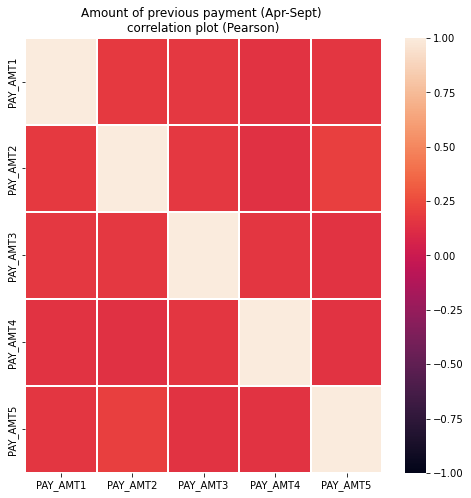

In [59]:
# Compute the correlation among payment amounts and its respective different months

var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = dataset[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

### (i) Features Correlation

#### (1) Credit Limit & Bill Statement Amount

In [60]:
# compute the correlation between credit limit and bill amount using Pearson R testing technique

dataset['BILL_SUM'] = dataset[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)
credit_bill = dataset[['LIMIT_BAL','BILL_SUM']]
print(credit_bill.corr())

from scipy import stats

credit_limit = dataset['LIMIT_BAL']
bill_amount = dataset[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)

stats.pearsonr(credit_limit, bill_amount) 

# r = 0.3, indicating a positive linear relationship between these two features

           LIMIT_BAL  BILL_SUM
LIMIT_BAL   1.000000  0.303736
BILL_SUM    0.303736  1.000000


(0.30373594430656786, 0.0)

#### (2) Credit Limit & Payment Default 

In [61]:
# compute the correlation between credit limit and payment default using t-test 
# null hypothesis: credit limit does not affect payment default result
# alternative hypothesis: credit limit impact default result
# significant level: 0.05

no_def_limit = dataset.loc[dataset['DPNM']==0,'LIMIT_BAL']
def_limit = dataset.loc[dataset['DPNM']==1,'LIMIT_BAL']

from scipy import stats
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))

# p-value < 0.05% , null hypothesis is rejected. Credit limit does impact the default result

Ttest_indResult(statistic=23.299643368247153, pvalue=9.306234473064981e-119)

#### (3) Education & Payment Default

In [62]:
# compute the correlation between education and payment default using Chi-Squared test
# null hypothesis: education does not affect default likelihood
# alternative hypothesis: education impacts default likelihood
# significant level: 0.05
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(dataset['DPNM'], dataset['EDUCATION'], margins=False)
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p 
# p < 0.05% significant level. Null hypothesis is rejected meaning education impacts default likelihood

3.4030189612069795e-27

#### (4) Age & Payment Default 

In [63]:
# compute the correlation between education and payment default using Chi-Squared test
# null hypothesis: age does not affect default likelihood
# alternative hypothesis: age impacts default likelihood
# significant level: 0.05
# Get the contigence table of age and default data

age_def_contigence = pd.crosstab(dataset['DPNM'], dataset['AGE'], margins=False)
# Use chi-squared test to test if age affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(age_def_contigence)

p
# p < 0.05% significant level. Null hypothesis is rejected meaning age impacts default likelihood

2.009812093461213e-06

#### (5) Sex & Payment Default

In [64]:
# compute the correlation between sex and payment default using permutation test
# null hypothesis: sex does not affect default likelihood
# alternative hypothesis: sex impacts default likelihood
# significant level: 0.05
# Get the true difference of 'HAS_DEF' proportions of two sex groups

male = dataset.loc[dataset['SEX']=='M','DPNM']
female = dataset.loc[dataset['SEX']=='F','DPNM']
true_diff_prop = male.sum()/len(male) - female.sum()/len(female)
true_diff_prop


0.03402214336158099

In [65]:
# Define functions to do permutation test

def permutation_sample(data1, data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def diff_of_prop(data1,data2):
    diff = data1.sum()/len(data1) - data2.sum()/len(data2)

    return diff

def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1,data2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [66]:
# Draw 10000 permutation tests

perm_replicates = draw_perm_reps(male,female,diff_of_prop,size=10000)

In [67]:
# Calculate p value - the probability of getting a mean difference equal or greater than the observed mean difference

p = np.sum(perm_replicates >= true_diff_prop) / len(perm_replicates)
p
# p < 0.05% significant level. The null hypothesis is rejected, sex impacts default likelihood

0.0

#### (6) Credit Limit & Sex

In [68]:
# compute the correlation between sex and payment default using t-test
# null hypothesis: sex does not affect credit limit
# alternative hypothesis: sex impacts credit limit
# significant level: 0.05
# Calculate the true mean difference of credit limit

male_limit= dataset.loc[dataset['SEX']=='M','LIMIT_BAL']
female_limit = dataset.loc[dataset['SEX']=='F','LIMIT_BAL']
print(np.mean(male_limit),np.mean(female_limit))

159843.94530374356 168840.42976522085


In [69]:
# Use t-test to verify if different sex groups have the same mean of credit limit.

from scipy import stats
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=np.mean(male_limit),std1=np.std(male_limit),nobs1=len(male_limit),
                     mean2=np.mean(female_limit),std2=np.std(female_limit),nobs2=len(female_limit))

# p < 0.05% significant level. Null hypothesis is rejected, Sex impacts credit limit

Ttest_indResult(statistic=-5.219188933210322, pvalue=1.812031312291557e-07)

#### (7) Summary of Correlation between Attributes

In [70]:
X = dataset.drop(['DPNM'],axis=1)
y = dataset['DPNM']

<AxesSubplot:title={'center':'Correlation with Default'}>

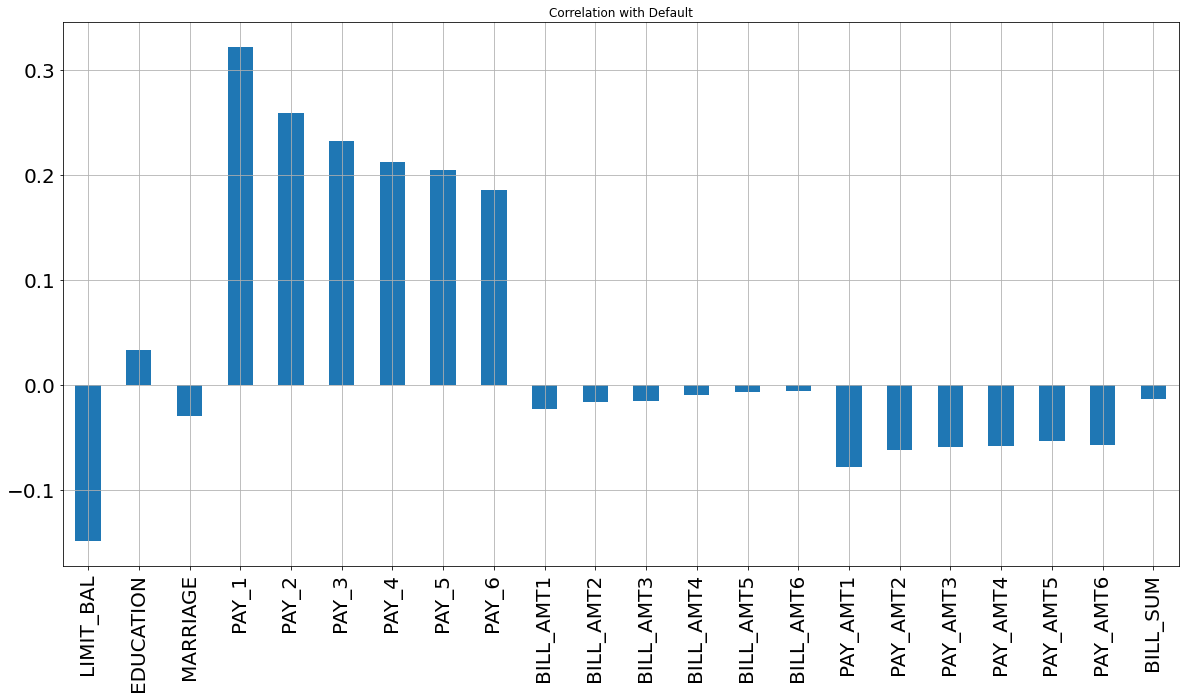

In [71]:
X.corrwith(dataset['DPNM']).plot.bar(
        figsize = (20, 10), title = "Correlation with Default", fontsize = 20,
        rot = 90, grid = True)


In [72]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset.corr() 

C:\Users\Lenovo\anaconda3\envs\Pang\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

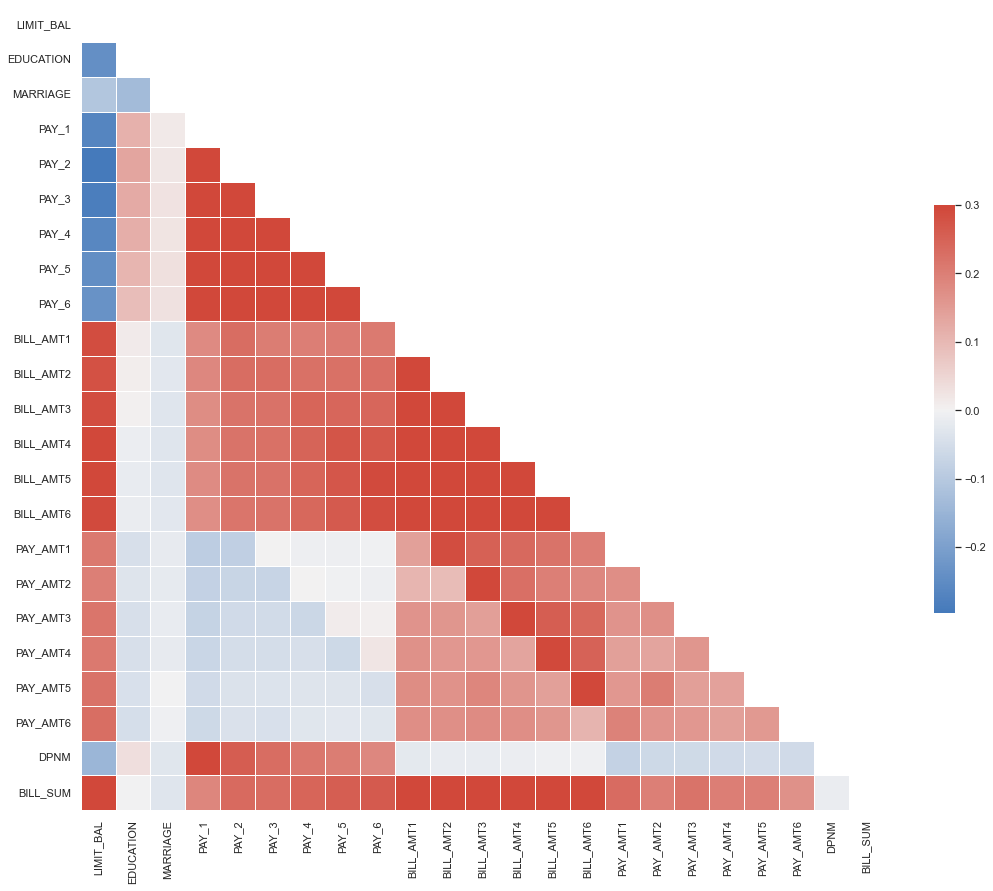

In [73]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 4. Methodology Overview

### (a) Libraries Import

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
import sklearn.model_selection as curves
import os
from IPython.display import display
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.cluster  import KMeans
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

In [75]:
# Inserting the processed dataset from data preprocessing section
# Inserting the unprocessed test set for data-scaling and PCA transformation
# Visualise the dataset to check on its condition

data = pd.read_csv("UCI_Credit_Card_Processed.csv")
test = pd.read_csv("CreditCard_test.csv")
# Change inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NMO'
test.rename(columns={'PAY_0':'PAY_1'},inplace = True)
test.columns
test.head

<bound method NDFrame.head of          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0     24001      50000    1          2         2   23      2      2      0   
1     24002      60000    1          2         2   26      0      0      0   
2     24003     400000    1          2         2   27      0      0      0   
3     24004      20000    1          5         2   27      5      4      3   
4     24005      50000    1          3         2   27      0      0     -2   
...     ...        ...  ...        ...       ...  ...    ...    ...    ...   
5995  29996     220000    1          3         1   39      0      0      0   
5996  29997     150000    1          3         2   43     -1     -1     -1   
5997  29998      30000    1          2         2   37      4      3      2   
5998  29999      80000    1          3         1   41      1     -1      0   
5999  30000      50000    1          2         1   46      0      0      0   

      PAY_4  ...  BILL_AMT4  BILL

### (b) Data Splitting into Training and Validation Sets

In [76]:
# Define predictor variables and target variable
X = data.drop(columns=['ID','DPNM'])
y = data['DPNM']
test_X = test.drop(columns=['ID','default payment next month'])
test_y = test['default payment next month']

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist()   

# Using train_test_split library to split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)

### (c) Data Scaling

In [77]:
# Scale the numerical columns while keeping the categorical columns the same
numerical_cols = num_cols
X_train_std = X_train.copy()
X_val_std = X_val.copy()
X_test_std = test_X.copy()
for i in numerical_cols:
    scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
    X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
    X_val_std[i] = scl.transform(X_val_std[[i]])
    X_test_std[i] = scl.transform(X_test_std[[i]])

### (d) Implementation of PCA

Actual number of components: 23


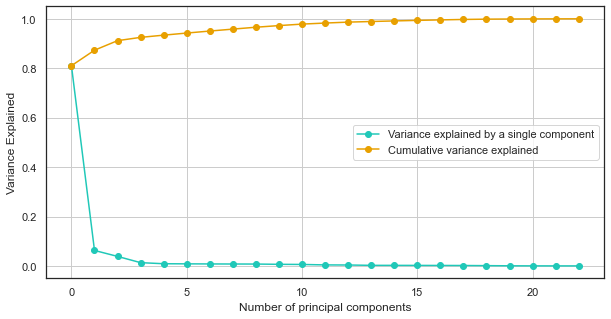

In [78]:
from sklearn.decomposition import PCA

# Identifying the number of principal components which yields the best cumulative explained variance
print(f"Actual number of components: {len(X_train_std.columns.values)}")

n_pc = len(X_train_std.columns.values) # with n_components = 11 -> 0.98693009 variance explained

pca = PCA(n_components=n_pc)
pca.fit(X_train_std)

fig=plt.figure(1, figsize=(10,5))
plt.grid(b=True, which='major', axis='both')
plt.plot(pca.explained_variance_ratio_, marker='o', color='#20c8b8')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='#e8a000')
# plt.xticks([n for n in range(0,n_pc)], [ "PC"+str(n) for n in range(1,n_pc+1)])
plt.legend(["Variance explained by a single component", "Cumulative variance explained"])
plt.xlabel('Number of principal components')
plt.ylabel('Variance Explained')
plt.savefig("PCA");

In [79]:
# Confirm the number of principal components that will be used and transform the data
n_pc = 15
pca = PCA(n_components=n_pc)
pca.fit(X_train_std)

# X_train_val.index = pd.RangeIndex(start=0, stop=len(X_train_val), step=1)
# Visualise the transformed dataset for a sense check
X_15d_train_std = pd.DataFrame(pca.transform(X_train_std))
X_15d_val_std = pd.DataFrame(pca.transform(X_val_std))
X_15d_test_std = pd.DataFrame(pca.transform(X_test_std))
X_15d_train_std.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_15d_val_std.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_15d_test_std.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_15d_test_std

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-12.409271,0.550147,-1.672602,-0.416420,0.051075,-0.111548,0.096871,0.249035,-0.502977,1.044556,1.135079,-0.163574,-0.381303,-0.526688,0.619571
1,-9.383875,0.225012,-0.472366,-0.443345,-0.121580,0.009905,0.036646,-0.049838,0.095843,0.370823,-0.460449,-0.132591,0.074028,0.016959,0.638823
2,-8.360750,-0.667999,-0.103703,0.481118,-0.105313,0.184548,0.126114,-0.354754,-0.229914,-1.403331,0.788552,1.216124,-0.203806,-0.103500,0.539541
3,-8.458884,2.242907,-6.325604,0.685226,0.223734,-0.340059,0.051896,0.461451,-0.653854,2.077274,1.580904,2.254330,-1.358576,-0.212317,0.505555
4,-8.369774,-2.239162,0.462512,-0.944919,-0.057294,0.018821,0.058186,0.145150,-0.218005,1.441317,-0.172148,0.431146,-0.809058,-0.857118,0.709221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,3.715121,2.513013,0.669974,-0.823499,-1.014221,-0.088977,-0.031004,-0.459424,0.003637,0.540061,-0.096123,1.154773,0.145355,-0.140931,1.803031
5996,7.622575,-1.895867,-0.183313,0.014157,-0.066146,0.653648,0.239599,-0.045640,0.360637,0.096220,-1.041614,0.639985,-0.473500,-0.309101,0.740249
5997,1.545616,0.292615,-3.293337,0.478690,0.836291,0.264784,0.616614,1.251927,-0.630255,1.906856,2.754621,-0.538274,-0.318493,-0.769380,0.109999
5998,5.678779,0.577788,0.640565,2.553721,-0.947688,-3.512885,-0.113504,0.234173,4.058119,1.985877,0.383432,0.208988,-1.042145,0.841767,0.106346


### (e) Resampling Techniques

1. K-means SMOTE and SMOTE are tested against the dataset, where SMOTE yields better recall performance
2. RandomSampler, ENN and Tomek-Link are tested against the dataset, where RandomSampler yields the best overall performance
3. SMOTE-ENN and SMOTE-Tomek Link are tested against the dataset, where SMOTE-ENN yields the best overall performance

#### (i) Oversampling - SMOTE

In [80]:
# Defining function for oversampling technique
def oversampling_smote(X_train, X_val, y_train, y_val):
    
    # use SMOTE to over sample data
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state = 42)
    X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
    
    # Check dimensions of the resampled dataset
    print(np.shape(X_train))
    print(np.shape(X_val))

    print("Training set:")
    print(f" + Non-defaulters (y=0): {len(y_train[y_train==0])}")
    print(f" + Defaulters (y=1):\t {len(y_train[y_train==1])}")
    print(len(y_train[y_train==1])/len(y_train))

    print("validation set:")
    print(f" + Non-defaulters (y=0): {len(y_val[y_val==0])}")
    print(f" + Defaulters (y=1):\t {len(y_val[y_val==1])}")
    print(len(y_val[y_val==1])/len(y_val))
    
    return X_train, X_val, y_train, y_val

#### (ii) Undersampling - Random Sampler

In [81]:
# Defining function for undersampling technique
def undersampling_random(X_train, X_val, y_train, y_val):
    
    from imblearn.under_sampling import RandomUnderSampler
    undersampler = RandomUnderSampler()
    X_train, y_train = undersampler.fit_resample(X_train, np.ravel(y_train))
    
    # Check dimensions of the resampled dataset
    print(np.shape(X_train))
    print(np.shape(X_val))

    print("Training set:")
    print(f" + Non-defaulters (y=0): {len(y_train[y_train==0])}")
    print(f" + Defaulters (y=1):\t {len(y_train[y_train==1])}")
    print(len(y_train[y_train==1])/len(y_train))

    print("validation set:")
    print(f" + Non-defaulters (y=0): {len(y_val[y_val==0])}")
    print(f" + Defaulters (y=1):\t {len(y_val[y_val==1])}")
    print(len(y_val[y_val==1])/len(y_val))
    
    return X_train, X_val, y_train, y_val

#### (iii) Oversampling + Undersampling - SMOTE-ENN

In [82]:
# Defining function for combined-sampling technique
def combined_sampling(X_train, X_val, y_train, y_val):
    
    #combining both SMOTE (oversampling) and Edited Nearest Neighbours (undersampling)
    from imblearn.combine import SMOTEENN
    combined = SMOTEENN()
    X_train, y_train = combined.fit_resample(X_train, y_train)
    
    # Check dimensions for the resampled dataset
    print(np.shape(X_train))
    print(np.shape(X_val))

    print("Training set:")
    print(f" + Non-defaulters (y=0): {len(y_train[y_train==0])}")
    print(f" + Defaulters (y=1):\t {len(y_train[y_train==1])}")
    print(len(y_train[y_train==1])/len(y_train))

    print("validation set:")
    print(f" + Non-defaulters (y=0): {len(y_val[y_val==0])}")
    print(f" + Defaulters (y=1):\t {len(y_val[y_val==1])}")
    print(len(y_val[y_val==1])/len(y_val))
    
    return X_train, X_val, y_train, y_val

### (f) Performance Measurement

In [83]:
# Defining function for the measuring metrics 
def performance(y_val, y_pred, model_name, t1, t0):

    from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score
    
    # Create confusion matrix to visualise the performance of the model
    cm = confusion_matrix(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    print("Classification Report :- \n",classification_report(y_val, y_pred))
    print('ROC AUC: {}'.format(roc_auc))
    print('Confusion Matrix:\n{}'.format(cm))
    confusion_matrix_xg = confusion_matrix(y_val, y_pred)
    # Turn matrix to percentages
    confusion_matrix_xg = confusion_matrix_xg.astype('float') / confusion_matrix_xg.sum(axis = 1)[:, np.newaxis]
    
    # Compute the roc, accuracy, precision, f1 score and training time of the model
    roc = roc_auc_score(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    training_time = t1 - t0
     
    # Turn to dataframe
    df_cm = pd.DataFrame(confusion_matrix_xg, index = ['Not Default', 'Default'], columns = ['Not Default', 'Default'])
    # Create image
    plt.figure(figsize=(6,6))
    heatmap = sns.heatmap(df_cm, annot = True, fmt = '.2f',linecolor = "Darkblue", cmap = "Greens",
            yticklabels = ['Not Default', 'Default'],)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
    res = pd.DataFrame([[model_name, acc, prec, rec, f1, roc, training_time]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC-AUC', 'Training Time'])
    print(res)
    return res

In [84]:
# Defining function for the measuring metrics of final test set 
def test_performance(y_val, y_pred, model_name):

    from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score
    
    # Create confusion matrix to visualise the performance of the model
    cm = confusion_matrix(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    print("Classification Report :- \n",classification_report(y_val, y_pred))
    print('ROC AUC: {}'.format(roc_auc))
    print('Confusion Matrix:\n{}'.format(cm))
    confusion_matrix_xg = confusion_matrix(y_val, y_pred)
    # Turn matrix to percentages
    confusion_matrix_xg = confusion_matrix_xg.astype('float') / confusion_matrix_xg.sum(axis = 1)[:, np.newaxis]
    
    # Compute the roc, accuracy, precision, f1 score and training time of the model
    roc = roc_auc_score(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
     
    # Turn to dataframe
    df_cm = pd.DataFrame(confusion_matrix_xg, index = ['Not Default', 'Default'], columns = ['Not Default', 'Default'])
    # Create image
    plt.figure(figsize=(6,6))
    heatmap = sns.heatmap(df_cm, annot = True, fmt = '.2f',linecolor = "Darkblue", cmap = "Greens",
            yticklabels = ['Not Default', 'Default'],)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
    res = pd.DataFrame([[model_name, acc, prec, rec, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC-AUC'])
    print(res)
    return res

In [85]:
# Defining a function for learning curve of the logistics Regression to better visualise the change in model accuracy with the respective hyper-parameter tuning
def learning_curve(model, X, y, param_name, param_range):
    
    from sklearn.model_selection import validation_curve

    # Calculate accuracy on training and test set using range of parameter values
    train_scores, test_scores = validation_curve(model, 
                                             X, 
                                             y, 
                                             param_name=param_name, 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot mean accuracy scores for training and test sets
    plt.semilogx(param_range, train_mean, label="Training score", color="darkorange")
    plt.semilogx(param_range, test_mean, label="Cross-validation score", color="navy")

    # Plot accurancy bands for training and test sets
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="grey")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

    # Create plot
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [86]:
# Defining a function for learning curve of the LDA to better visualise the change in model accuracy with the respective hyper-parameter tuning
def learning_curve_lda(model, X, y, param_name, param_range):
    
    from sklearn.model_selection import validation_curve

    # Calculate accuracy on training and test set using range of parameter values
    train_scores, test_scores = validation_curve(model, 
                                             X, 
                                             y, 
                                             param_name=param_name, 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot mean accuracy scores for training and test sets
    plt.plot(param_range, train_mean, label="Training score", color="darkorange")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="navy")

    # Plot accurancy bands for training and test sets
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="grey")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

    # Create plot
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [87]:
# Defining function for roc curve to clearly visualise the which model yields the best performance
# This function is plotting for PCA method only
def roc_curve_PCA(X,y):
    
    plt.figure()

    # Add the models to the list that you want to view on the ROC plot
    models = [
    {
        'label': 'K-Nearest Neighbor',
        'model': knn_0,
    },
    {
        'label': 'Neural Network',
        'model': nn_best_0,
    },
        {
        'label': 'Linear Discriminant Analysis',
        'model': best_LDA_0,
    },
        {
        'label': 'Gaussian Naive Bayes',
        'model': nb_best_0,
    },
    
        {
        'label': 'Logistic Regression',
        'model': lr_best_0,
    },
    ]

    # Below for loop iterates through your models list
    for m in models:
        model = m['model'] # select the model
        y_pred=model.predict(X) # predict the test data
    # Computing False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(X)[:,1])
    # Calculating Area under the curve to display it on the plot
        auc = metrics.roc_auc_score(y,model.predict(X))
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [88]:
# Defining function for roc curve to clearly visualise the which model yields the best performance
# This function is plotting for PCA + SMOTE technique only
def roc_curve_PCA_SMOTE(X,y):
    
    plt.figure()

    # Add the models to the list that you want to view on the ROC plot
    models = [
    {
        'label': 'K-Nearest Neighbor',
        'model': knn_1,
    },
    {
        'label': 'Neural Network',
        'model': nn_best_1,
    },
        {
        'label': 'Linear Discriminant Analysis',
        'model': best_LDA_1,
    },
        {
        'label': 'Gaussian Naive Bayes',
        'model': nb_best_1,
    },
    
        {
        'label': 'Logistic Regression',
        'model': lr_best_1,
    },
    ]

    # Below for loop iterates through your models list
    for m in models:
        model = m['model'] # select the model
        y_pred=model.predict(X) # predict the test data
    # Computing False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(X)[:,1])
    # Calculating Area under the curve to display it on the plot
        auc = metrics.roc_auc_score(y,model.predict(X))
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [89]:
# Defining function for roc curve to clearly visualise the which model yields the best performance
# This function is plotting for PCA + RandomSampler technique only
def roc_curve_PCA_RS(X,y):
    
    plt.figure()

    # Add the models to the list that you want to view on the ROC plot
    models = [
    {
        'label': 'K-Nearest Neighbor',
        'model': knn_2,
    },
    {
        'label': 'Neural Network',
        'model': nn_best_2,
    },
        {
        'label': 'Linear Discriminant Analysis',
        'model': best_LDA_2,
    },
        {
        'label': 'Gaussian Naive Bayes',
        'model': nb_best_2,
    },
    
        {
        'label': 'Logistic Regression',
        'model': lr_best_2,
    },
    ]

    # Below for loop iterates through your models list
    for m in models:
        model = m['model'] # select the model
        y_pred=model.predict(X) # predict the test data
    # Computing False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(X)[:,1])
    # Calculating Area under the curve to display it on the plot
        auc = metrics.roc_auc_score(y,model.predict(X))
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [90]:
# Defining function for roc curve to clearly visualise the which model yields the best performance
# This function is plotting for PCA + SMOTE-ENN technique only
def roc_curve_PCA_SMOTEENN(X,y):
    
    plt.figure()

    # Add the models to the list that you want to view on the ROC plot
    models = [
    {
        'label': 'K-Nearest Neighbor',
        'model': knn_3,
    },
    {
        'label': 'Neural Network',
        'model': nn_best_3,
    },
        {
        'label': 'Linear Discriminant Analysis',
        'model': best_LDA_3,
    },
        {
        'label': 'Gaussian Naive Bayes',
        'model': nb_best_3,
    },
    
        {
        'label': 'Logistic Regression',
        'model': lr_best_3,
    },
    ]

    # Below for loop iterates through your models list
    for m in models:
        model = m['model'] # select the model
        y_pred=model.predict(X) # predict the test data
    # Computing False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(X)[:,1])
    # Calculating Area under the curve to display it on the plot
        auc = metrics.roc_auc_score(y,model.predict(X))
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## 5. Model Training & Validation

### (a) K- Nearest Neighbours (KNN)

#### (i) KNN + PCA

In [91]:
from sklearn.neighbors import KNeighborsClassifier

# Determine the number of neighbors used through computing error rate for a range of values
error_rate = []

# Setting the range of neighbours to be 1 to 50
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_15d_train_std, y_train)
    pred_i = knn.predict(X_15d_val_std)
    error_rate.append(np.mean(pred_i != y_val))  

Text(0, 0.5, 'Error Rate')

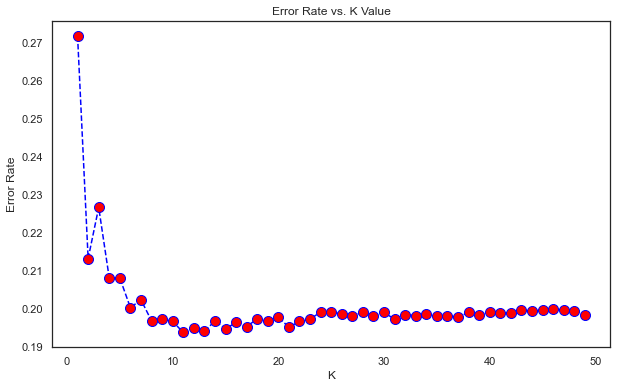

In [92]:
# Visualising the error rate of each value of neighbor used
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      5589
           1       0.63      0.31      0.41      1611

    accuracy                           0.81      7200
   macro avg       0.73      0.63      0.65      7200
weighted avg       0.78      0.81      0.78      7200

ROC AUC: 0.6276035028902543
Confusion Matrix:
[[5305  284]
 [1118  493]]


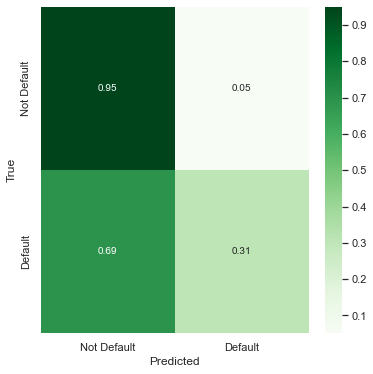

       Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  Training Time
0  KNN + PCA  0.805278   0.634492  0.306021  0.412898  0.627604       0.034865


In [93]:
# Use the number of neighbors that gives the lowest error rate which is 15 from above graph
knn_0 = KNeighborsClassifier(n_neighbors=15)
t0 = time.time()
knn_0.fit(X_15d_train_std,y_train)
t1 = time.time()
y_pred = knn_0.predict(X_15d_val_std)

# Call the measuring metrics function to compute the performance of the model
r0 = performance(y_val, y_pred, 'KNN + PCA', t1, t0)

#### (ii) KNN + PCA + SMOTE

In [94]:
# Call the oversampling function to resample the dataset and visualise its dimensions
X_train_OS, X_val_OS, y_train_OS, y_val_OS = oversampling_smote(X_15d_train_std, X_15d_val_std, y_train, y_val)

(26082, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 13041
 + Defaulters (y=1):	 13041
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [95]:
# Determine the number of neighbors used through computing error rate for a range of values
error_rate = []

# Setting the range to be 1 to 50
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train_OS,y_train_OS)
    pred_i = knn.predict(X_val_OS)
    error_rate.append(np.mean(pred_i != y_val_OS))  

Text(0, 0.5, 'Error Rate')

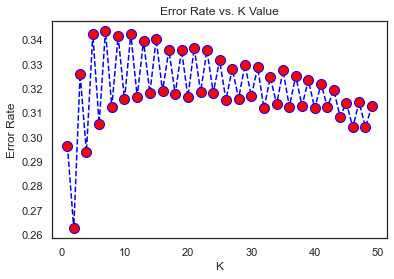

In [96]:
# Visualising the error rate of each value of neighbor usedplt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      5589
           1       0.41      0.39      0.40      1611

    accuracy                           0.74      7200
   macro avg       0.62      0.61      0.62      7200
weighted avg       0.73      0.74      0.74      7200

ROC AUC: 0.6144311801613505
Confusion Matrix:
[[4679  910]
 [ 980  631]]


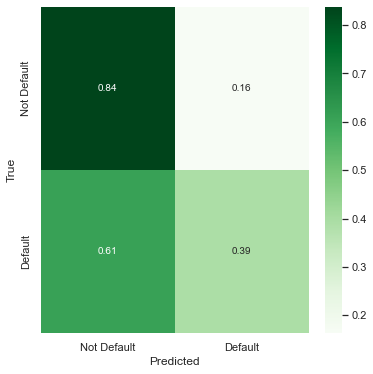

           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  KNN+PCA+SMOTE    0.7375   0.409474  0.391682  0.400381  0.614431   

   Training Time  
0       0.064827  


In [97]:
# Use the number of neighbors that gives the lowest error rate which is 2 from above graph
knn_1 = KNeighborsClassifier(n_neighbors=2)
t0 = time.time()
knn_1.fit(X_train_OS,y_train_OS)
t1 = time.time()
y_pred = knn_1.predict(X_val_OS)

# Call the measuring metrics function to compute the performance of the model
r1 = performance(y_val_OS, y_pred, 'KNN+PCA+SMOTE', t1, t0)

#### (iii) KNN + PCA + RandomSampler

In [98]:
# Call the undersampling function to resample the dataset and check its dimensions
X_train_US, X_val_US, y_train_US, y_val_US = undersampling_random(X_15d_train_std, X_15d_val_std, y_train, y_val)

(7518, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 3759
 + Defaulters (y=1):	 3759
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [99]:
# Determine the number of neighbors used through computing error rate for a range of values
error_rate = []

# Setting the range to be 1 to 50
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train_US,y_train_US)
    pred_i = knn.predict(X_val_US)
    error_rate.append(np.mean(pred_i != y_val_US))  

Text(0, 0.5, 'Error Rate')

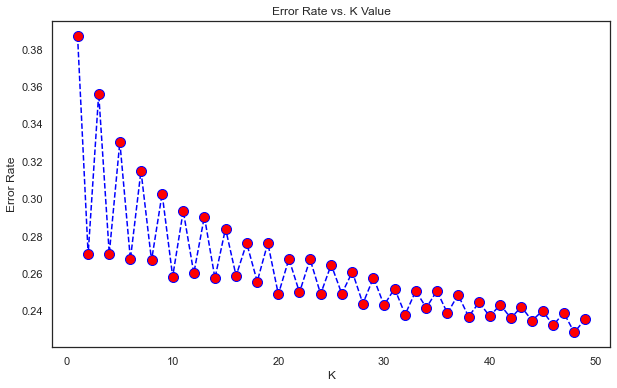

In [100]:
# Visualising the error rate of each value of neighbor used
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      5589
           1       0.48      0.53      0.50      1611

    accuracy                           0.76      7200
   macro avg       0.67      0.68      0.67      7200
weighted avg       0.77      0.76      0.77      7200

ROC AUC: 0.6794126731378776
Confusion Matrix:
[[4656  933]
 [ 764  847]]


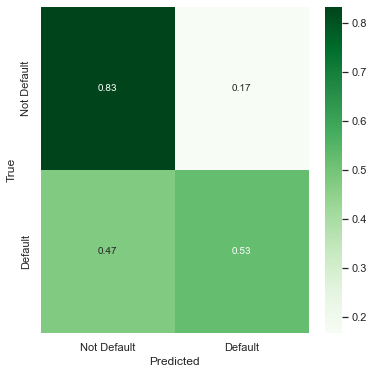

                   Model  Accuracy  Precision   Recall  F1 Score   ROC-AUC  \
0  KNN+PCA+randomSampler  0.764306   0.475843  0.52576  0.499558  0.679413   

   Training Time  
0       0.012965  


In [101]:
# Use the number of neighbors that gives the lowest error rate which is 49 from above graph
knn_2 = KNeighborsClassifier(n_neighbors=49)
t0 = time.time()
knn_2.fit(X_train_US,y_train_US)
t1 = time.time()
y_pred = knn_2.predict(X_val_US)

# Call the measuring metrics function to compute the performance of the training model
r2 = performance(y_val_US, y_pred, 'KNN+PCA+randomSampler', t1, t0)

#### (iv) KNN + PCA + SMOTE-ENN

In [102]:
# Call the combined-sampling function to resample the dataset
X_train_CS, X_val_CS, y_train_CS, y_val_CS = combined_sampling(X_15d_train_std, X_15d_val_std, y_train, y_val)

(16903, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 6807
 + Defaulters (y=1):	 10096
0.597290421818612
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [103]:
# Determine the number of neighbors used through computing error rate for a range of values
error_rate = []

# Setting the range to be 1 to 50
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train_CS,y_train_CS)
    pred_i = knn.predict(X_val_CS)
    error_rate.append(np.mean(pred_i != y_val_CS))  

Text(0, 0.5, 'Error Rate')

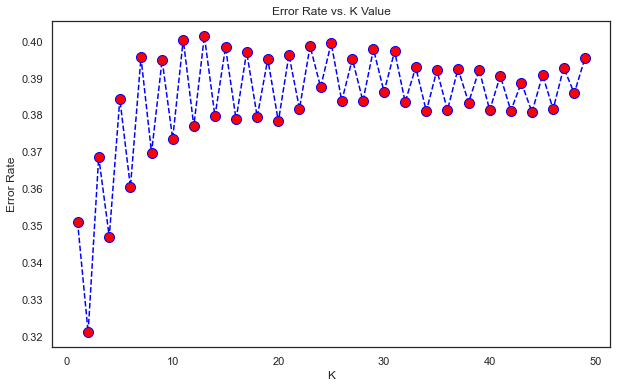

In [104]:
# Visualising the error rate of each value of neighbor used
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.70      0.77      5589
           1       0.37      0.60      0.46      1611

    accuracy                           0.68      7200
   macro avg       0.61      0.65      0.61      7200
weighted avg       0.75      0.68      0.70      7200

ROC AUC: 0.6511233658293276
Confusion Matrix:
[[3920 1669]
 [ 643  968]]


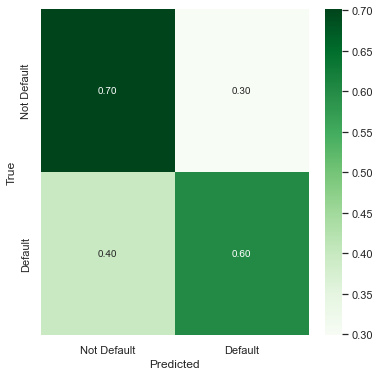

                      Model  Accuracy  Precision    Recall  F1 Score  \
0  KNN+PCA+combinedSampling  0.678889   0.367084  0.600869  0.455744   

    ROC-AUC  Training Time  
0  0.651123        0.03299  


In [105]:
# Use the number of neighbors that gives the lowest error rate which is 2 from above graph
knn_3 = KNeighborsClassifier(n_neighbors=2)
t0 = time.time()
knn_3.fit(X_train_CS,y_train_CS)
t1 = time.time()
y_pred = knn_3.predict(X_val_CS)

# Call the measuring metrics function to compute the performance of the training model
r3 = performance(y_val_CS, y_pred, 'KNN+PCA+combinedSampling', t1, t0)

In [106]:
# Create a dataframe to store the results of each different combinations of techniques
rt = [r0, r1, r2, r3]
frame = pd.concat(rt)
frame

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Training Time
0,KNN + PCA,0.805278,0.634492,0.306021,0.412898,0.627604,0.034865
0,KNN+PCA+SMOTE,0.737500,0.409474,0.391682,0.400381,0.614431,0.064827
0,KNN+PCA+randomSampler,0.764306,0.475843,0.525760,0.499558,0.679413,0.012965
0,KNN+PCA+combinedSampling,0.678889,0.367084,0.600869,0.455744,0.651123,0.032990


### (b) Neural Network (NN)

#### (i) NN + PCA

In [107]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import seed
from random import randint

# Since this is a binary classification model, using too many hidden layers will in fact overfit the dataset
# Therefore, one hidden layer is used with n number of neurons
# RandomizedSearchCV is deployed for hyper-parameter tuning in this case as using gridsearch is computationally more expensive
# due to the large range values

seed = 1
nn = MLPClassifier(max_iter = 100)

# Creating parameter search space
parameter_space = {
    'hidden_layer_sizes': [randint(1, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Applying RandomizedSearchCV with the predetermined parameter search space
clf = RandomizedSearchCV(nn, parameter_space, n_iter = 500, scoring= 'roc_auc', n_jobs=-1, cv=5, random_state=1)
result = clf.fit(X_15d_train_std, y_train) 

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7680833388209901
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 55, 'alpha': 0.05, 'activation': 'tanh'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.94      0.89      5589
           1       0.64      0.35      0.45      1611

    accuracy                           0.81      7200
   macro avg       0.74      0.65      0.67      7200
weighted avg       0.79      0.81      0.79      7200

ROC AUC: 0.6451829261588256
Confusion Matrix:
[[5276  313]
 [1053  558]]


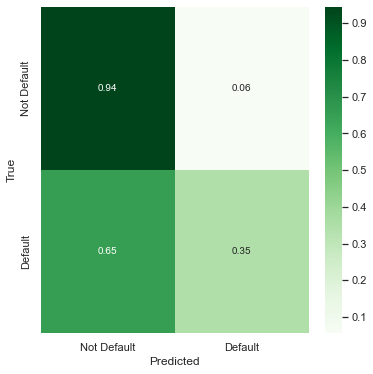

    Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  Training Time
0  NN+PCA  0.810278   0.640643  0.346369  0.449637  0.645183      15.583414


In [185]:
# Use the best parameter combination to train the model and validate it
nn_best_0 = MLPClassifier(hidden_layer_sizes=(55,), activation='tanh', 
    solver='adam', alpha=0.05, batch_size='auto', 
    learning_rate='constant',max_iter=1000)
t0 = time.time()
nn_best_0.fit(X_15d_train_std,y_train.astype('int'))
t1 = time.time()

y_pred=nn_best_0.predict(X_15d_val_std)

# Call the measuring metrics function to compute the performance of the training model
nn_r0 = performance(y_val, y_pred, 'NN+PCA', t1, t0)

#### (ii) NN + PCA + SMOTE

In [109]:
# Call the oversampling function to resample the dataset and visualise its dimensions
X_train_OS, X_val_OS, y_train_OS, y_val_OS = oversampling_smote(X_15d_train_std, X_15d_val_std, y_train, y_val)

(26082, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 13041
 + Defaulters (y=1):	 13041
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [110]:
seed = 1
nn = MLPClassifier(max_iter = 100)

# Creating parameter search space
parameter_space = {
    'hidden_layer_sizes': [randint(1, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Applying RandomizedSearchCV with the predetermined parameter search space
clf = RandomizedSearchCV(nn, parameter_space, n_iter = 500, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
result = clf.fit(X_train_OS, y_train_OS) 

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8138958692989497
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 89, 'alpha': 0.0005, 'activation': 'tanh'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      5589
           1       0.41      0.54      0.47      1611

    accuracy                           0.73      7200
   macro avg       0.64      0.66      0.64      7200
weighted avg       0.76      0.73      0.74      7200

ROC AUC: 0.6611750335605354
Confusion Matrix:
[[4355 1234]
 [ 736  875]]


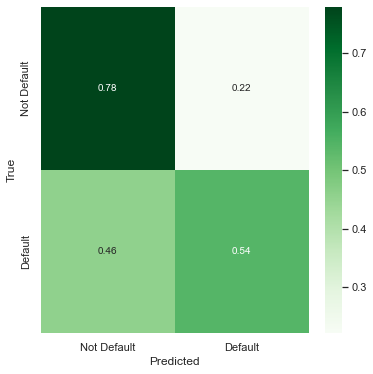

          Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  NN+PCA+SMOTE  0.726389   0.414889  0.543141   0.47043  0.661175   

   Training Time  
0      68.586764  


In [186]:
# Use the best parameter combination to train the model and validate it
nn_best_1 = MLPClassifier(hidden_layer_sizes=(89,), activation='tanh', 
    solver='adam', alpha=0.0005, batch_size='auto', 
    learning_rate='constant',max_iter=1000)
t0 = time.time()
nn_best_1.fit(X_train_OS,y_train_OS.astype('int'))
t1 = time.time()

y_pred=nn_best_1.predict(X_val_OS)

# Call the measuring metrics function to compute the performance of the training model
nn_r1 = performance(y_val, y_pred, 'NN+PCA+SMOTE', t1, t0)

#### (iii) NN + PCA + RandomSampler

In [112]:
# Call the undersampling function to resample the dataset and check its dimensions
X_train_US, X_val_US, y_train_US, y_val_US = undersampling_random(X_15d_train_std, X_15d_val_std, y_train, y_val)

(7518, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 3759
 + Defaulters (y=1):	 3759
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [113]:
seed = 1
nn = MLPClassifier(max_iter = 100)

# Creating parameter search space
parameter_space = {
    'hidden_layer_sizes': [randint(1, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Applying RandomizedSearchCV with the predetermined parameter search space
clf = RandomizedSearchCV(nn, parameter_space, n_iter = 500, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
result = clf.fit(X_train_US, y_train_US) 

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7626561041065513
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 93, 'alpha': 0.01, 'activation': 'relu'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      5589
           1       0.41      0.68      0.51      1611

    accuracy                           0.71      7200
   macro avg       0.65      0.70      0.65      7200
weighted avg       0.78      0.71      0.73      7200

ROC AUC: 0.6961814457968616
Confusion Matrix:
[[3990 1599]
 [ 518 1093]]


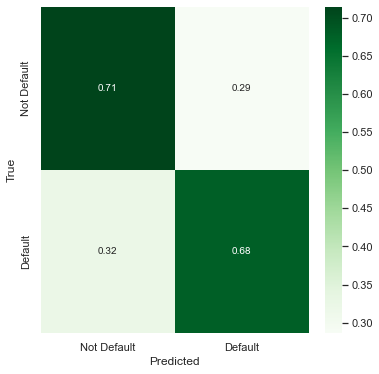

                  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  NN+PCA+RandomSampler  0.705972   0.406018  0.678461  0.508018  0.696181   

   Training Time  
0       8.125329  


In [187]:
# Use the best parameter combination to train the model and validate it
nn_best_2 = MLPClassifier(hidden_layer_sizes=(93,), activation='relu', 
    solver='adam', alpha=0.01, batch_size='auto', 
    learning_rate='constant',max_iter=1000)
t0 = time.time()
nn_best_2.fit(X_train_US,y_train_US.astype('int'))
t1 = time.time()

y_pred=nn_best_2.predict(X_val_US)

# Call the measuring metrics function to compute the performance of the training model
nn_r2 = performance(y_val, y_pred, 'NN+PCA+RandomSampler', t1, t0)

#### (iv) NN + PCA + SMOTE-ENN

In [115]:
# Call the combined-sampling function to resample the dataset
X_train_CS, X_val_CS, y_train_CS, y_val_CS = combined_sampling(X_15d_train_std, X_15d_val_std, y_train, y_val)

(16766, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 6777
 + Defaulters (y=1):	 9989
0.5957890969819873
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [116]:
seed = 1
nn = MLPClassifier(max_iter = 100)

# Creating parameter search space
parameter_space = {
    'hidden_layer_sizes': [randint(1, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Applying RandomizedSearchCV with the predetermined parameter search space
clf = RandomizedSearchCV(nn, parameter_space, n_iter = 100, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
result = clf.fit(X_train_CS, y_train_CS) 

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.921150016332439
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 71, 'alpha': 0.0005, 'activation': 'tanh'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.65      0.75      5589
           1       0.35      0.66      0.46      1611

    accuracy                           0.66      7200
   macro avg       0.61      0.66      0.60      7200
weighted avg       0.75      0.66      0.68      7200

ROC AUC: 0.6567694323746465
Confusion Matrix:
[[3657 1932]
 [ 549 1062]]


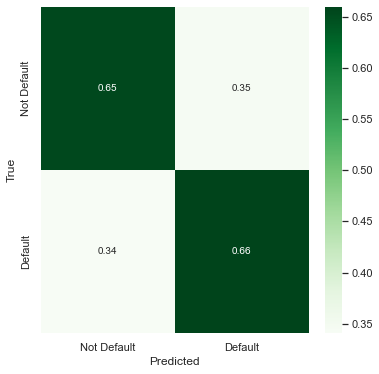

              Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  NN+PCA+SMOTE-ENN  0.655417   0.354709  0.659218  0.461238  0.656769   

   Training Time  
0       50.66965  


In [188]:
# Use the best parameter combination to train the model and validate it
nn_best_3 = MLPClassifier(hidden_layer_sizes=(71,), activation='tanh', 
    solver='adam', alpha=0.0005, batch_size='auto', 
    learning_rate='constant',max_iter=1000)
t0 = time.time()
nn_best_3.fit(X_train_CS,y_train_CS.astype('int'))
t1 = time.time()

y_pred=nn_best_3.predict(X_val_CS)

# Call the measuring metrics function to compute the performance of the training model
nn_r3 = performance(y_val, y_pred, 'NN+PCA+SMOTE-ENN', t1, t0)

In [189]:
# Create a dataframe to store the results of each different combinations of techniques
nn_rt = [nn_r0, nn_r1, nn_r2, nn_r3]
frame = pd.concat(nn_rt)
frame

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Training Time
0,NN+PCA,0.810278,0.640643,0.346369,0.449637,0.645183,15.583414
0,NN+PCA+SMOTE,0.726389,0.414889,0.543141,0.470430,0.661175,68.586764
0,NN+PCA+RandomSampler,0.705972,0.406018,0.678461,0.508018,0.696181,8.125329
0,NN+PCA+SMOTE-ENN,0.655417,0.354709,0.659218,0.461238,0.656769,50.669650


### (c) Linear Discriminant Analysis (LDA)

#### (i) LDA + PCA

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=5,
                     scoring="roc_auc", n_jobs= 4, verbose = 1)

result = gsLDA.fit(X_15d_train_std,y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Score: 0.7127933601973446
Best Hyperparameters: {'solver': 'svd', 'tol': 0.0001}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      5589
           1       0.70      0.25      0.37      1611

    accuracy                           0.81      7200
   macro avg       0.76      0.61      0.63      7200
weighted avg       0.79      0.81      0.77      7200

ROC AUC: 0.6092009343972747
Confusion Matrix:
[[5415  174]
 [1209  402]]


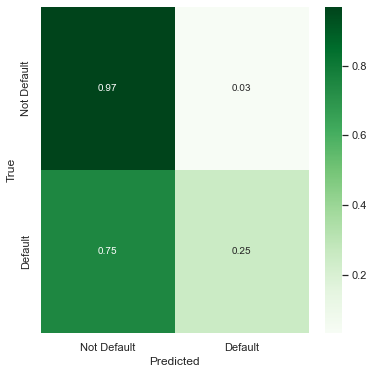

     Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  Training Time
0  LDA+PCA  0.807917   0.697917  0.249534  0.367627  0.609201       0.041888


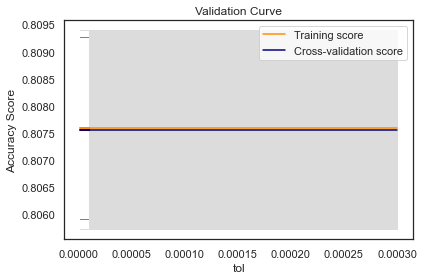

None


In [120]:
# Using the optimal parameters to train the model
best_LDA_0 = LinearDiscriminantAnalysis(solver="svd", tol = 0.0001)
t0 = time.time()
best_LDA_0.fit(X_15d_train_std, y_train)
t1 = time.time()

y_pred=best_LDA_0.predict(X_15d_val_std)

# Call the measuring metrics function to compute the performance of the training model
lda_r0 = performance(y_val, y_pred, 'LDA+PCA', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = [0.00001,0.000002,0.00003,0.00004,0.00005,0.0001,0.0002,0.0003]
print(learning_curve_lda(LinearDiscriminantAnalysis(solver="svd"), X_15d_train_std, y_train, 'tol', param_range))

#### (ii) LDA + PCA + SMOTE

In [121]:
# Call the oversampling function to resample the dataset and visualise its dimensions
X_train_OS, X_val_OS, y_train_OS, y_val_OS = oversampling_smote(X_15d_train_std, X_15d_val_std, y_train, y_val)

(26082, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 13041
 + Defaulters (y=1):	 13041
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [122]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=5,
                     scoring="roc_auc", n_jobs= 4, verbose = 1)

result = gsLDA.fit(X_train_OS,y_train_OS)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Score: 0.7243582980220935
Best Hyperparameters: {'solver': 'svd', 'tol': 0.0001}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      5589
           1       0.37      0.64      0.47      1611

    accuracy                           0.67      7200
   macro avg       0.62      0.66      0.61      7200
weighted avg       0.76      0.67      0.70      7200

ROC AUC: 0.660819186930433
Confusion Matrix:
[[3789 1800]
 [ 574 1037]]


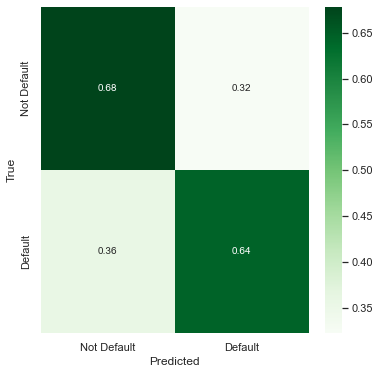

           Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC  \
0  LDA+PCA+SMOTE  0.670278   0.365527  0.6437  0.466277  0.660819   

   Training Time  
0       0.073803  


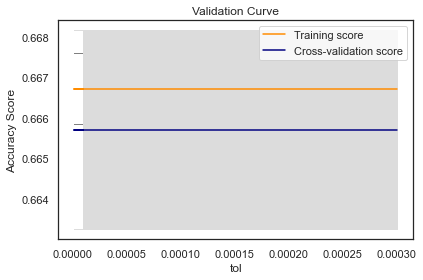

None


In [123]:
# Using the optimal parameters to train the model
best_LDA_1 = LinearDiscriminantAnalysis(solver="svd", tol = 0.0001)
t0 = time.time()
best_LDA_1.fit(X_train_OS, y_train_OS)
t1 = time.time()

y_pred=best_LDA_1.predict(X_val_OS)

# Call the measuring metrics function to compute the performance of the training model
lda_r1 = performance(y_val, y_pred, 'LDA+PCA+SMOTE', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = [0.00001,0.000002,0.00003,0.00004,0.00005,0.0001,0.0002,0.0003]
print(learning_curve_lda(LinearDiscriminantAnalysis(solver="svd"), X_train_OS, y_train_OS, 'tol', param_range))

#### (iii) LDA + PCA + RandomSampler

In [124]:
# Call the undersampling function to resample the dataset and check its dimensions
X_train_US, X_val_US, y_train_US, y_val_US = undersampling_random(X_15d_train_std, X_15d_val_std, y_train, y_val)

(7518, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 3759
 + Defaulters (y=1):	 3759
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [125]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=5,
                     scoring="roc_auc", n_jobs= 4, verbose = 1)

result = gsLDA.fit(X_train_US,y_train_US)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Score: 0.7144295543545681
Best Hyperparameters: {'solver': 'svd', 'tol': 0.0001}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.70      0.77      5589
           1       0.38      0.63      0.47      1611

    accuracy                           0.68      7200
   macro avg       0.62      0.67      0.62      7200
weighted avg       0.76      0.68      0.71      7200

ROC AUC: 0.665252276268928
Confusion Matrix:
[[3901 1688]
 [ 592 1019]]


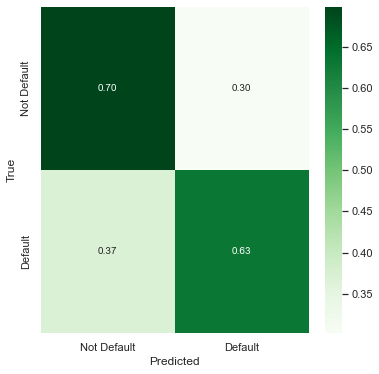

                   Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  LDA+PCA+RandomSampler  0.683333   0.376431  0.632526  0.471978  0.665252   

   Training Time  
0       0.022939  


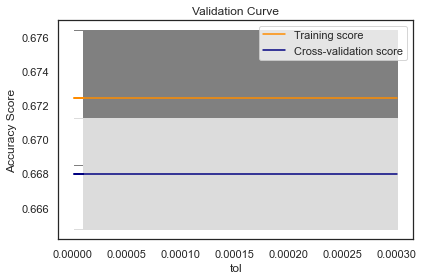

None


In [126]:
# Using the optimal parameters to train the model
best_LDA_2 = LinearDiscriminantAnalysis(solver="svd", tol = 0.0001)
t0 = time.time()
best_LDA_2.fit(X_train_US, y_train_US)
t1 = time.time()

y_pred=best_LDA_2.predict(X_val_US)

# Call the measuring metrics function to compute the performance of the training model
lda_r2 = performance(y_val, y_pred, 'LDA+PCA+RandomSampler', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = [0.00001,0.000002,0.00003,0.00004,0.00005,0.0001,0.0002,0.0003]
print(learning_curve_lda(LinearDiscriminantAnalysis(solver="svd"), X_train_US, y_train_US, 'tol', param_range))

#### (iv) LDA + PCA + SMOTE-ENN

In [127]:
# Call the combined-sampling function to resample the dataset
X_train_CS, X_val_CS, y_train_CS, y_val_CS = combined_sampling(X_15d_train_std, X_15d_val_std, y_train, y_val)

(16878, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 6767
 + Defaulters (y=1):	 10111
0.5990638701267923
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [128]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=5,
                     scoring="roc_auc", n_jobs= 4, verbose = 1)

result = gsLDA.fit(X_train_CS,y_train_CS)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Score: 0.8095782243400749
Best Hyperparameters: {'solver': 'svd', 'tol': 0.0001}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.48      0.62      5589
           1       0.30      0.77      0.43      1611

    accuracy                           0.55      7200
   macro avg       0.59      0.63      0.53      7200
weighted avg       0.75      0.55      0.58      7200

ROC AUC: 0.626031180561178
Confusion Matrix:
[[2682 2907]
 [ 367 1244]]


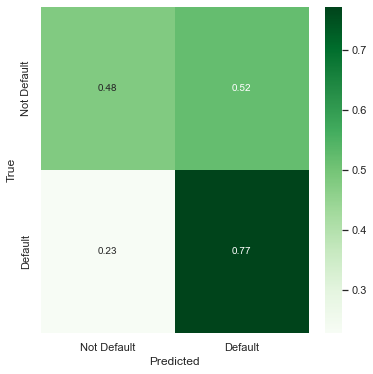

               Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  LDA+PCA+SMOTE-ENN  0.545278   0.299687  0.772191  0.431795  0.626031   

   Training Time  
0       0.048869  


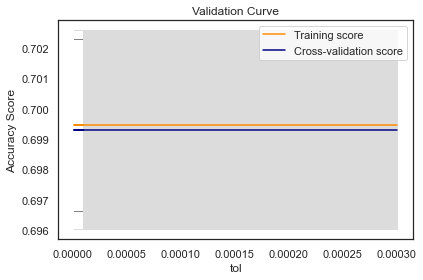

None


In [129]:
# Using the optimal parameters to train the model
best_LDA_3 = LinearDiscriminantAnalysis(solver="svd", tol = 0.0001)
t0 = time.time()
best_LDA_3.fit(X_train_CS, y_train_CS)
t1 = time.time()

y_pred=best_LDA_3.predict(X_val_CS)

# Call the measuring metrics function to compute the performance of the training model
lda_r3 = performance(y_val, y_pred, 'LDA+PCA+SMOTE-ENN', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = [0.00001,0.000002,0.00003,0.00004,0.00005,0.0001,0.0002,0.0003]
print(learning_curve_lda(LinearDiscriminantAnalysis(solver="svd"), X_train_CS, y_train_CS, 'tol', param_range))

In [130]:
# Create a dataframe to store the results of each different combinations of techniques
lda_rt = [lda_r0, lda_r1, lda_r2, lda_r3]
frame = pd.concat(lda_rt)
frame

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Training Time
0,LDA+PCA,0.807917,0.697917,0.249534,0.367627,0.609201,0.041888
0,LDA+PCA+SMOTE,0.670278,0.365527,0.643700,0.466277,0.660819,0.073803
0,LDA+PCA+RandomSampler,0.683333,0.376431,0.632526,0.471978,0.665252,0.022939
0,LDA+PCA+SMOTE-ENN,0.545278,0.299687,0.772191,0.431795,0.626031,0.048869


### (d) Gaussian Naive Bayes (NB)

#### (i) NB + PCA

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Creating the parameter space for the hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='roc_auc', verbose=1, cv=10, n_jobs=-1)
result = nb_grid.fit(X_15d_train_std, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Score: 0.7203143301968739
Best Hyperparameters: {'var_smoothing': 0.003511191734215131}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5589
           1       0.51      0.53      0.52      1611

    accuracy                           0.78      7200
   macro avg       0.69      0.69      0.69      7200
weighted avg       0.78      0.78      0.78      7200

ROC AUC: 0.6918368183312993
Confusion Matrix:
[[4781  808]
 [ 760  851]]


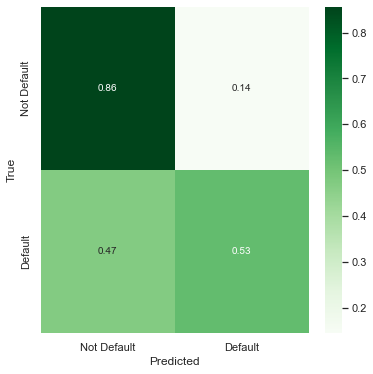

      Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  Training Time
0  NB + PCA  0.782222    0.51296  0.528243  0.520489  0.691837        0.02294


In [132]:
# Training the model using the tuned parameters
nb_best_0 = GaussianNB(var_smoothing=0.003511191734215131)
t0 = time.time()
nb_best_0.fit(X_15d_train_std, y_train)
t1 = time.time()

y_pred = nb_best_0.predict(X_15d_val_std)

# Call the measuring metrics function to compute the performance of the training model
nb_r0 = performance(y_val, y_pred, 'NB + PCA', t1, t0)

#### (ii) NB + PCA +SMOTE

In [133]:
# Call the oversampling function to resample the dataset and visualise its dimensions
X_train_OS, X_val_OS, y_train_OS, y_val_OS = oversampling_smote(X_15d_train_std, X_15d_val_std, y_train, y_val)

(26082, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 13041
 + Defaulters (y=1):	 13041
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [134]:
# Creating the parameter space for the hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='roc_auc', verbose=1, cv=10, n_jobs=-1)
result = nb_grid.fit(X_train_OS, y_train_OS)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Score: 0.7283536228916855
Best Hyperparameters: {'var_smoothing': 0.001873817422860383}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.15      0.26      5589
           1       0.24      0.92      0.38      1611

    accuracy                           0.33      7200
   macro avg       0.56      0.54      0.32      7200
weighted avg       0.73      0.33      0.29      7200

ROC AUC: 0.538982698456965
Confusion Matrix:
[[ 859 4730]
 [ 122 1489]]


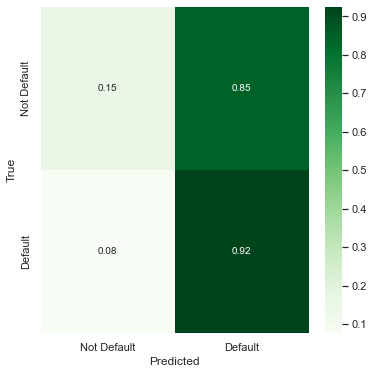

          Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  NB+PCA+SMOTE  0.326111   0.239428  0.924271  0.380332  0.538983   

   Training Time  
0       0.009974  


In [135]:
# Training the model using the tuned parameters
nb_best_1 = GaussianNB(var_smoothing=0.0023101297000831605)
t0 = time.time()
nb_best_1.fit(X_train_OS, y_train_OS)
t1 = time.time()

y_pred = nb_best_1.predict(X_val_OS)

# Call the measuring metrics function to compute the performance of the training model
nb_r1 = performance(y_val_OS, y_pred, 'NB+PCA+SMOTE', t1, t0)

#### (iii) NB + PCA + RandomSampler

In [136]:
# Call the undersampling function to resample the dataset and check its dimensions
X_train_US, X_val_US, y_train_US, y_val_US = undersampling_random(X_15d_train_std, X_15d_val_std, y_train, y_val)

(7518, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 3759
 + Defaulters (y=1):	 3759
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [137]:
# Creating the parameter space for the hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='roc_auc', verbose=1, cv=10, n_jobs=-1)
result = nb_grid.fit(X_train_US, y_train_US)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Score: 0.7243623641919419
Best Hyperparameters: {'var_smoothing': 0.002848035868435802}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.22      0.35      5589
           1       0.25      0.90      0.39      1611

    accuracy                           0.37      7200
   macro avg       0.57      0.56      0.37      7200
weighted avg       0.74      0.37      0.36      7200

ROC AUC: 0.5612735910822435
Confusion Matrix:
[[1240 4349]
 [ 160 1451]]


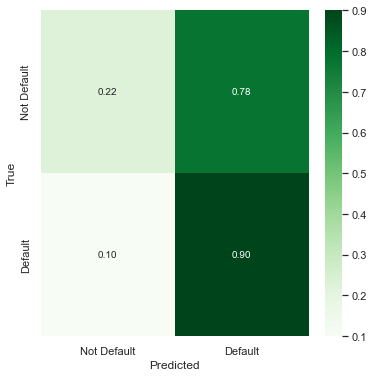

                  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  NB+PCA+RandomSampler   0.37375   0.250172  0.900683   0.39158  0.561274   

   Training Time  
0       0.005027  


In [138]:
# Training the model using the tuned parameters
nb_best_2 = GaussianNB(var_smoothing=0.002848035868435802)
t0 = time.time()
nb_best_2.fit(X_train_US, y_train_US)
t1 = time.time()

y_pred = nb_best_2.predict(X_val_US)

# Call the measuring metrics function to compute the performance of the training model
nb_r2 = performance(y_val_US, y_pred, 'NB+PCA+RandomSampler', t1, t0)

#### (iv) NB + PCA + SMOTE-ENN

In [139]:
# Call the combined-sampling function to resample the dataset
X_train_CS, X_val_CS, y_train_CS, y_val_CS = combined_sampling(X_15d_train_std, X_15d_val_std, y_train, y_val)

(16816, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 6784
 + Defaulters (y=1):	 10032
0.5965746907706946
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [140]:
# Creating the parameter space for the hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='roc_auc', verbose=1, cv=10, n_jobs=-1)
result = nb_grid.fit(X_train_CS, y_train_CS)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Score: 0.8120991615375365
Best Hyperparameters: {'var_smoothing': 0.0023101297000831605}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.14      0.23      5589
           1       0.24      0.93      0.38      1611

    accuracy                           0.31      7200
   macro avg       0.56      0.53      0.31      7200
weighted avg       0.73      0.31      0.27      7200

ROC AUC: 0.5345131248431926
Confusion Matrix:
[[ 757 4832]
 [ 107 1504]]


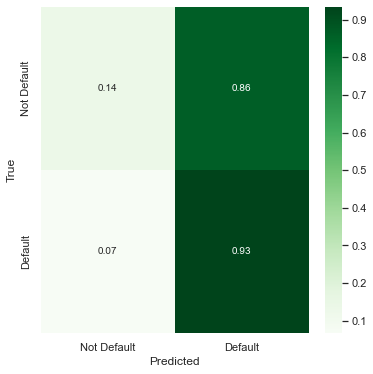

                  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  NB+PCA+RandomSampler  0.314028   0.237374  0.933582  0.378508  0.534513   

   Training Time  
0        0.00895  


In [141]:
# Training the model using the tuned parameters
nb_best_3 = GaussianNB(var_smoothing=0.0023101297000831605)
t0 = time.time()
nb_best_3.fit(X_train_CS, y_train_CS)
t1 = time.time()

y_pred = nb_best_3.predict(X_val_CS)

# Call the measuring metrics function to compute the performance of the training model
nb_r3 = performance(y_val_CS, y_pred, 'NB+PCA+RandomSampler', t1, t0)

In [142]:
# Create a dataframe to store the results of each different combinations of techniques
nb_rt = [nb_r0, nb_r1, nb_r2, nb_r3]
frame = pd.concat(nb_rt)
frame

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Training Time
0,NB + PCA,0.782222,0.512960,0.528243,0.520489,0.691837,0.022940
0,NB+PCA+SMOTE,0.326111,0.239428,0.924271,0.380332,0.538983,0.009974
0,NB+PCA+RandomSampler,0.373750,0.250172,0.900683,0.391580,0.561274,0.005027
0,NB+PCA+RandomSampler,0.314028,0.237374,0.933582,0.378508,0.534513,0.008950


### (d) Logistic Regression (LR)

#### (i) LR + PCA 

In [143]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression

# Setting the paramter space for GridSearch Hyperparameter tuning
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=10, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_15d_train_std, y_train)
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.7169934952677416
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.81      0.97      0.89      5589
           1       0.70      0.22      0.33      1611

    accuracy                           0.80      7200
   macro avg       0.76      0.60      0.61      7200
weighted avg       0.79      0.80      0.76      7200

ROC AUC: 0.5961820455383728
Confusion Matrix:
[[5436  153]
 [1257  354]]


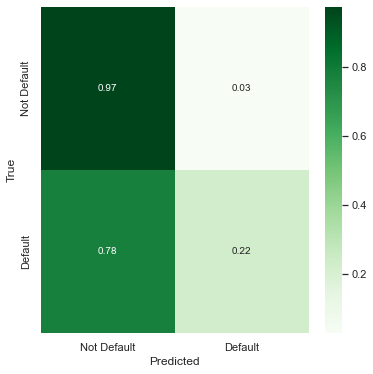

    Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  Training Time
0  LR+PCA  0.804167   0.698225  0.219739  0.334278  0.596182       0.063877


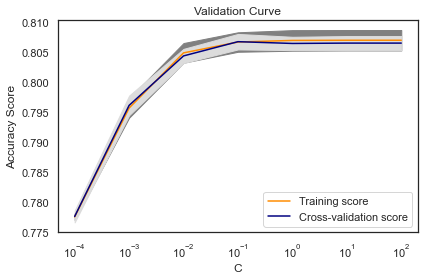

None


In [144]:
# Training the model using the tuned parameters
lr_best_0 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.01)
t0 = time.time()
lr_best_0.fit(X_15d_train_std, y_train)
t1 = time.time()

y_pred = lr_best_0.predict(X_15d_val_std)

# Call the measuring metrics function to compute the performance of the training model
lr_r0 = performance(y_val, y_pred, 'LR+PCA', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = c_values
print(learning_curve(LogisticRegression(penalty='l2',solver='newton-cg'), X_15d_train_std, y_train, 'C', param_range))

#### (ii) LR + PCA + SMOTE

In [145]:
# Call the oversampling function to resample the dataset and visualise its dimensions
X_train_OS, X_val_OS, y_train_OS, y_val_OS = oversampling_smote(X_15d_train_std, X_15d_val_std, y_train, y_val)

(26082, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 13041
 + Defaulters (y=1):	 13041
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [146]:
# Setting up the parameter search space
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=10, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_OS, y_train_OS)
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.7257547569337641
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.67      0.76      5589
           1       0.36      0.66      0.47      1611

    accuracy                           0.67      7200
   macro avg       0.62      0.66      0.61      7200
weighted avg       0.76      0.67      0.69      7200

ROC AUC: 0.6631211947650563
Confusion Matrix:
[[3728 1861]
 [ 549 1062]]


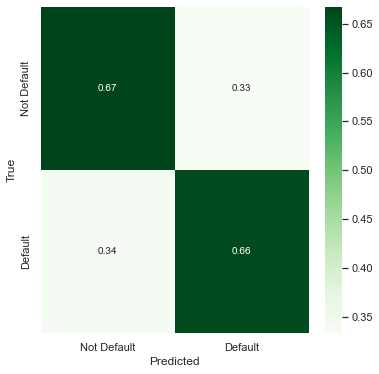

          Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  LR+PCA+SMOTE  0.665278   0.363325  0.659218  0.468461  0.663121   

   Training Time  
0       0.117694  


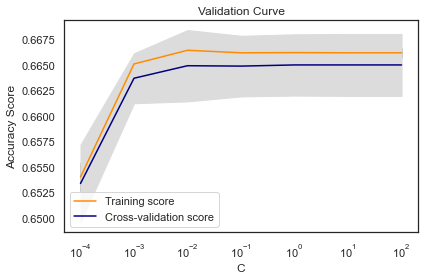

None


In [147]:
# Training the model using the tuned parameters
lr_best_1 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.01)
t0 = time.time()
lr_best_1.fit(X_train_OS, y_train_OS)
t1 = time.time()

y_pred = lr_best_1.predict(X_val_OS)

# Call the measuring metrics function to compute the performance of the training model
lr_r1 = performance(y_val_OS, y_pred, 'LR+PCA+SMOTE', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = c_values
print(learning_curve(LogisticRegression(penalty='l2',solver='newton-cg'), X_train_OS, y_train_OS, 'C', param_range))

#### (iii) LR + PCA + RandomSampler

In [148]:
# Call the undersampling function to resample the dataset and check its dimensions
X_train_US, X_val_US, y_train_US, y_val_US = undersampling_random(X_15d_train_std, X_15d_val_std, y_train, y_val)

(7518, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 3759
 + Defaulters (y=1):	 3759
0.5
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [149]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression

# Setting up the parameter search space
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=10, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_US, y_train_US)
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.7099262732005431
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.71      0.78      5589
           1       0.38      0.63      0.48      1611

    accuracy                           0.69      7200
   macro avg       0.63      0.67      0.63      7200
weighted avg       0.76      0.69      0.71      7200

ROC AUC: 0.6692415568889809
Confusion Matrix:
[[3956 1633]
 [ 595 1016]]


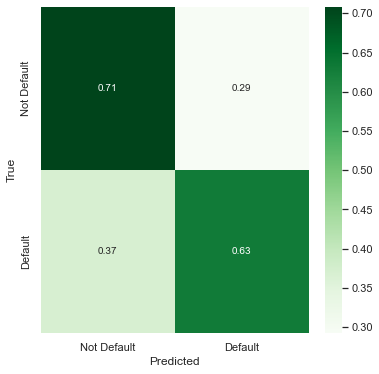

                  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  LR+PCA+RandomSampler  0.690556   0.383541  0.630664  0.476995  0.669242   

   Training Time  
0        0.04089  


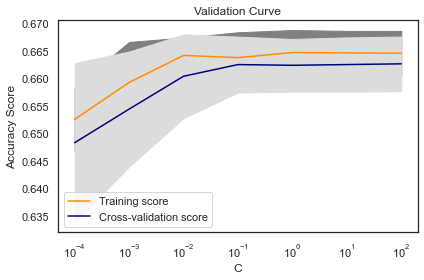

None


In [150]:
# Training the model using the tuned parameters
lr_best_2 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.01)
t0 = time.time()
lr_best_2.fit(X_train_US, y_train_US)
t1 = time.time()

y_pred = lr_best_2.predict(X_15d_val_std)

# Call the measuring metrics function to compute the performance of the training model
lr_r2 = performance(y_val_US, y_pred, 'LR+PCA+RandomSampler', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = c_values
print(learning_curve(LogisticRegression(penalty='l2',solver='newton-cg'), X_train_US, y_train_US, 'C', param_range))

#### (iv) LR + PCA + SMOTE-ENN

In [151]:
# Call the combined-sampling function to resample the dataset
X_train_CS, X_val_CS, y_train_CS, y_val_CS = combined_sampling(X_15d_train_std, X_15d_val_std, y_train, y_val)

(16800, 15)
(7200, 15)
Training set:
 + Non-defaulters (y=0): 6771
 + Defaulters (y=1):	 10029
0.5969642857142857
validation set:
 + Non-defaulters (y=0): 5589
 + Defaulters (y=1):	 1611
0.22375


In [152]:
# Setting up the parameter search space
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=10, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_CS, y_train_CS)
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: 0.8038350708954122
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.47      0.61      5589
           1       0.29      0.76      0.42      1611

    accuracy                           0.54      7200
   macro avg       0.58      0.62      0.52      7200
weighted avg       0.74      0.54      0.57      7200

ROC AUC: 0.6174813655314559
Confusion Matrix:
[[2635 2954]
 [ 381 1230]]


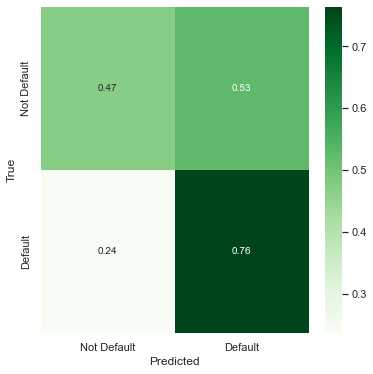

              Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  LR+PCA+SMOTE-ENN  0.536806   0.293977  0.763501  0.424504  0.617481   

   Training Time  
0       0.057843  


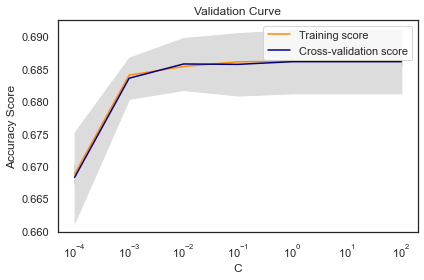

None


In [153]:
# Training the model using the tuned parameters
lr_best_3 = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.01)
t0 = time.time()
lr_best_3.fit(X_train_CS, y_train_CS)
t1 = time.time()

y_pred = lr_best_3.predict(X_val_CS)

# Call the measuring metrics function to compute the performance of the training model
lr_r3 = performance(y_val_CS, y_pred, 'LR+PCA+SMOTE-ENN', t1, t0)

# Plot the validation curve to visualize the changes in model accuracy with respect to hyper-parameter tuning
param_range = c_values
print(learning_curve(LogisticRegression(penalty='l2',solver='liblinear'), X_train_CS, y_train_CS, 'C', param_range))

In [154]:
# Create a dataframe to store the results of each different combinations of techniques
lr_rt = [lr_r0, lr_r1, lr_r2, lr_r3]
frame = pd.concat(lr_rt)
frame

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Training Time
0,LR+PCA,0.804167,0.698225,0.219739,0.334278,0.596182,0.063877
0,LR+PCA+SMOTE,0.665278,0.363325,0.659218,0.468461,0.663121,0.117694
0,LR+PCA+RandomSampler,0.690556,0.383541,0.630664,0.476995,0.669242,0.040890
0,LR+PCA+SMOTE-ENN,0.536806,0.293977,0.763501,0.424504,0.617481,0.057843


## 6. Results

### (a) Comparative Analysis (All Model)

In [190]:
# Create a dataframe to store the results of each different combinations of techniques
final_rt = [r0, r1, r2, r3, nn_r0, nn_r1, nn_r2, nn_r3, lda_r0, lda_r1, lda_r2, lda_r3, nb_r0, nb_r1, nb_r2, nb_r3, lr_r0, lr_r1, lr_r2, lr_r3]
frame = pd.concat(final_rt)
frame

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Training Time
0,KNN + PCA,0.805278,0.634492,0.306021,0.412898,0.627604,0.034865
0,KNN+PCA+SMOTE,0.737500,0.409474,0.391682,0.400381,0.614431,0.064827
0,KNN+PCA+randomSampler,0.764306,0.475843,0.525760,0.499558,0.679413,0.012965
0,KNN+PCA+combinedSampling,0.678889,0.367084,0.600869,0.455744,0.651123,0.032990
0,NN+PCA,0.810278,0.640643,0.346369,0.449637,0.645183,15.583414
0,NN+PCA+SMOTE,0.726389,0.414889,0.543141,0.470430,0.661175,68.586764
0,NN+PCA+RandomSampler,0.705972,0.406018,0.678461,0.508018,0.696181,8.125329
0,NN+PCA+SMOTE-ENN,0.655417,0.354709,0.659218,0.461238,0.656769,50.669650
0,LDA+PCA,0.807917,0.697917,0.249534,0.367627,0.609201,0.041888
0,LDA+PCA+SMOTE,0.670278,0.365527,0.643700,0.466277,0.660819,0.073803


### (b) ROC Curve

####  (i) PCA

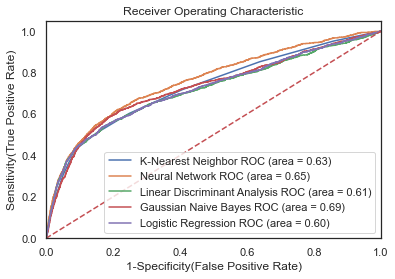

In [191]:
# Plotting the ROC Curve of different models for PCA Technique only
roc_curve_PCA(X_15d_val_std,y_val)

#### (ii) PCA + SMOTE

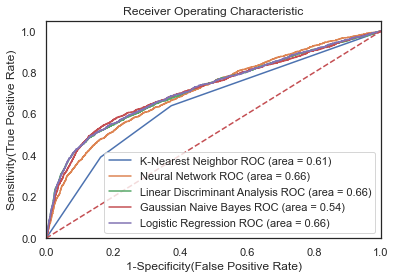

In [192]:
# Plotting the ROC Curve of different models for PCA + SMOTE Technique 
roc_curve_PCA_SMOTE(X_val_OS,y_val_OS)

#### (iii) PCA + RandomSampler

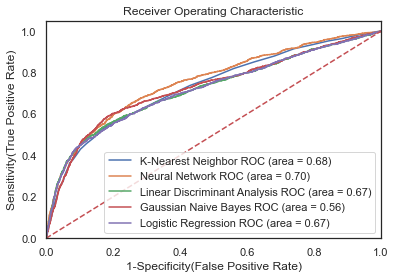

In [193]:
# Plotting the ROC Curve of different models for PCA + RandomSampler Technique 
roc_curve_PCA_RS(X_val_US,y_val_US)

#### (iv) PCA + SMOTE-ENN

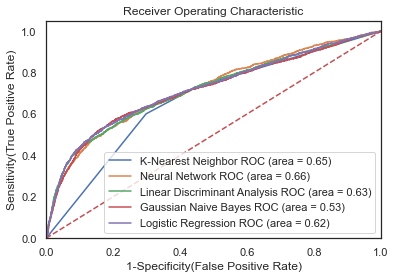

In [194]:
# Plotting the ROC Curve of different models for PCA + SMOTE Technique 
roc_curve_PCA_SMOTEENN(X_val_CS,y_val_CS)

## 7. Final Prediction on Test Set

### - Model -

### (a) K-Nearest Neighbour (KNN)

#### (i) KNN + PCA 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4734
           1       0.68      0.28      0.40      1266

    accuracy                           0.82      6000
   macro avg       0.76      0.62      0.65      6000
weighted avg       0.80      0.82      0.79      6000

ROC AUC: 0.6234349877962587
Confusion Matrix:
[[4564  170]
 [ 908  358]]


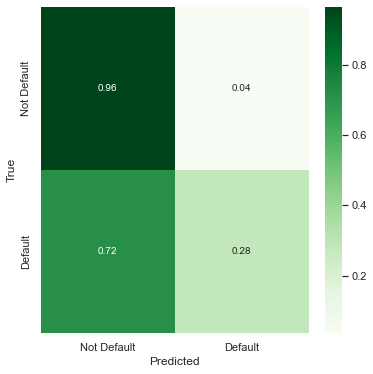

            Model  Accuracy  Precision   Recall  F1 Score   ROC-AUC
0  KNN+PCA (test)  0.820333    0.67803  0.28278  0.399108  0.623435


In [160]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for KNN + PCA was used
y_pred_KNN_test0 = knn_0.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the model
knn_test_r0 = test_performance(test_y, y_pred_KNN_test0, 'KNN+PCA (test)')

#### (ii) KNN + PCA + SMOTE

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      4734
           1       0.39      0.38      0.39      1266

    accuracy                           0.74      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.74      0.74      0.74      6000

ROC AUC: 0.6111766849472505
Confusion Matrix:
[[3988  746]
 [ 785  481]]


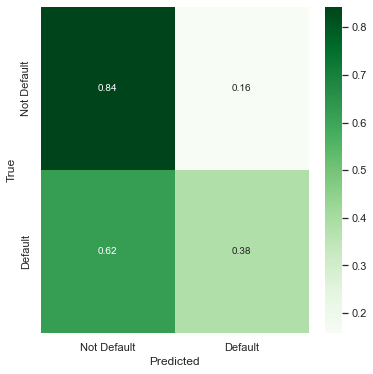

                  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  KNN+PCA+SMOTE (test)  0.744833   0.392013  0.379937   0.38588  0.611177


In [161]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for KNN + PCA +SMOTE was used
y_pred_KNN_test1 = knn_1.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the model
knn_test_r1 = test_performance(test_y, y_pred_KNN_test1, 'KNN+PCA+SMOTE (test)')

#### (iii) KNN + PCA + RandomSampler

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      4734
           1       0.50      0.52      0.51      1266

    accuracy                           0.79      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000

ROC AUC: 0.6886634350278414
Confusion Matrix:
[[4071  663]
 [ 611  655]]


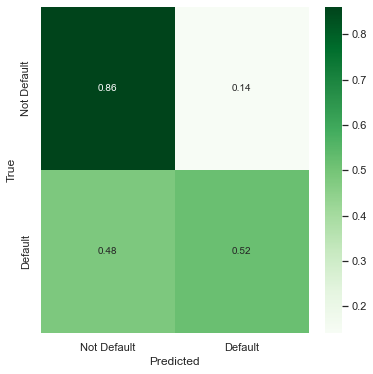

                          Model  Accuracy  Precision    Recall  F1 Score  \
0  KNN+PCA+RandomSampler (test)  0.787667   0.496965  0.517378  0.506966   

    ROC-AUC  
0  0.688663  


In [162]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for KNN + PCA + RandonSampler was used
y_pred_KNN_test2 = knn_2.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the model
knn_test_r2 = test_performance(test_y, y_pred_KNN_test2, 'KNN+PCA+RandomSampler (test)')

#### (iv) KNN + PCA + SMOTE-ENN

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      4734
           1       0.37      0.61      0.46      1266

    accuracy                           0.70      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.77      0.70      0.72      6000

ROC AUC: 0.6659578685599986
Confusion Matrix:
[[3426 1308]
 [ 496  770]]


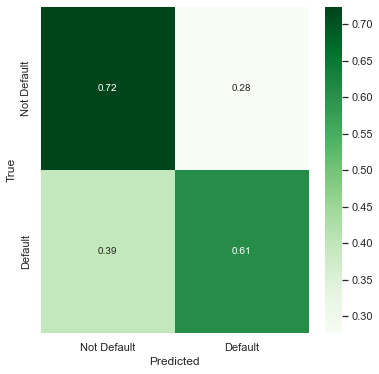

                      Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  KNN+PCA+SMOTE-ENN (test)  0.699333   0.370549  0.608215  0.460526  0.665958


In [163]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for KNN + PCA + SMOTE-ENN was used
y_pred_KNN_test3 = knn_3.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the model
knn_test_r3 = test_performance(test_y, y_pred_KNN_test3, 'KNN+PCA+SMOTE-ENN (test)')

### (b) Neural Network (NN)

#### (i) NN + PCA

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      4734
           1       0.67      0.33      0.45      1266

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000

ROC AUC: 0.6451984935036852
Confusion Matrix:
[[4527  207]
 [ 843  423]]


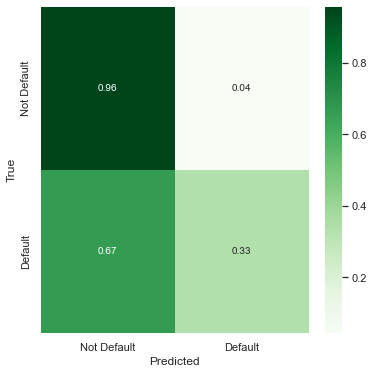

           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  NN+PCA (test)     0.825   0.671429  0.334123  0.446203  0.645198


In [195]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NN + PCA was used
y_pred_nn_test0 = nn_best_0.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nn_test_r0 = test_performance(test_y, y_pred_nn_test0, 'NN+PCA (test)')

#### (ii) NN + PCA + SMOTE

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      4734
           1       0.40      0.54      0.46      1266

    accuracy                           0.73      6000
   macro avg       0.63      0.66      0.64      6000
weighted avg       0.77      0.73      0.75      6000

ROC AUC: 0.6633063829872436
Confusion Matrix:
[[3715 1019]
 [ 580  686]]


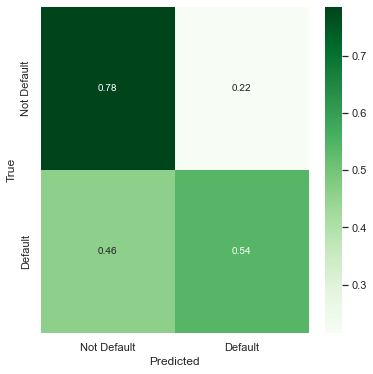

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  NN+PCA+SMOTE (test)    0.7335   0.402346  0.541864  0.461797  0.663306


In [196]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NN + PCA + SMOTE was used
y_pred_nn_test1 = nn_best_1.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nn_test_r1 = test_performance(test_y, y_pred_nn_test1, 'NN+PCA+SMOTE (test)')

#### (iii) NN + PCA + RandomSampler

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      4734
           1       0.40      0.68      0.50      1266

    accuracy                           0.72      6000
   macro avg       0.65      0.70      0.65      6000
weighted avg       0.79      0.72      0.74      6000

ROC AUC: 0.7030090882333507
Confusion Matrix:
[[3444 1290]
 [ 407  859]]


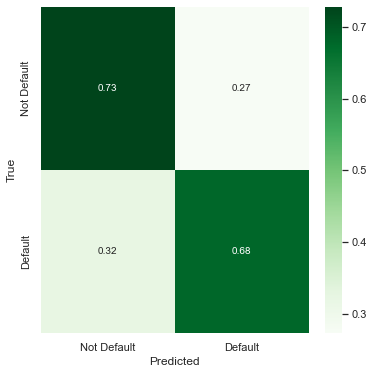

                         Model  Accuracy  Precision    Recall  F1 Score  \
0  NN+PCA+RandomSampler (test)  0.717167   0.399721  0.678515  0.503075   

    ROC-AUC  
0  0.703009  


In [197]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NN + PCA + RandomSampler was used
y_pred_nn_test2 = nn_best_2.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nn_test_r2 = test_performance(test_y, y_pred_nn_test2, 'NN+PCA+RandomSampler (test)')

#### (iv) NN + PCA + SMOTE-ENN

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.68      0.77      4734
           1       0.36      0.68      0.47      1266

    accuracy                           0.68      6000
   macro avg       0.62      0.68      0.62      6000
weighted avg       0.77      0.68      0.70      6000

ROC AUC: 0.6758419980898491
Confusion Matrix:
[[3198 1536]
 [ 410  856]]


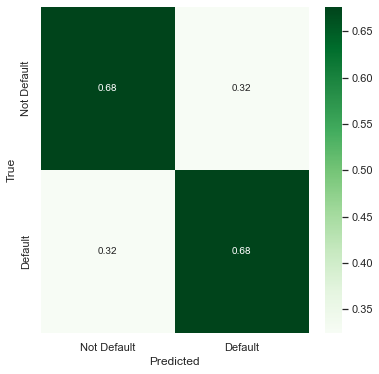

                     Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  NN+PCA+SMOTE-ENN (test)  0.675667    0.35786  0.676145  0.468015  0.675842


In [198]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NN + PCA + SMOTE-ENN was used
y_pred_nn_test3 = nn_best_3.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nn_test_r3 = test_performance(test_y, y_pred_nn_test3, 'NN+PCA+SMOTE-ENN (test)')

### (c) Linear Discriminant Analysis (LDA)

#### (i) LDA + PCA

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      4734
           1       0.74      0.23      0.36      1266

    accuracy                           0.82      6000
   macro avg       0.78      0.61      0.63      6000
weighted avg       0.81      0.82      0.78      6000

ROC AUC: 0.6060248840194058
Confusion Matrix:
[[4631  103]
 [ 970  296]]


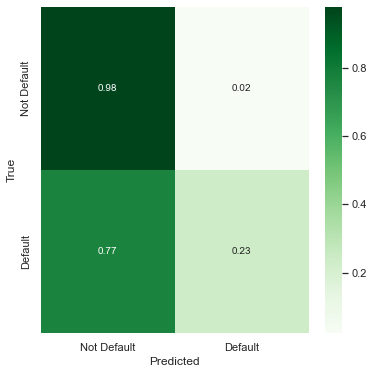

            Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  LDA+PCA (test)  0.821167   0.741855  0.233807  0.355556  0.606025


In [168]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LDA + PCA was used
y_pred_LDA_test0 = best_LDA_0.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lda_test_r0 = test_performance(test_y, y_pred_LDA_test0, 'LDA+PCA (test)')

#### (ii) LDA + PCA + SMOTE

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      4734
           1       0.38      0.63      0.47      1266

    accuracy                           0.70      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.70      0.73      6000

ROC AUC: 0.6755696914725982
Confusion Matrix:
[[3431 1303]
 [ 473  793]]


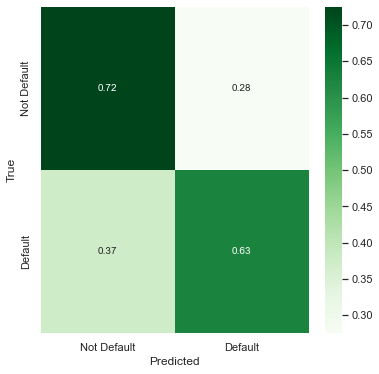

                  Model  Accuracy  Precision    Recall  F1 Score  ROC-AUC
0  LDA+PCA+SMOTE (test)     0.704    0.37834  0.626382  0.471743  0.67557


In [169]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LDA + PCA + SMOTE was used
y_pred_LDA_test1 = best_LDA_1.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lda_test_r1 = test_performance(test_y, y_pred_LDA_test1, 'LDA+PCA+SMOTE (test)')

#### (iii) LDA + PCA + RandomSampler

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.74      0.81      4734
           1       0.40      0.63      0.49      1266

    accuracy                           0.72      6000
   macro avg       0.64      0.69      0.65      6000
weighted avg       0.78      0.72      0.74      6000

ROC AUC: 0.6852866327484748
Confusion Matrix:
[[3523 1211]
 [ 473  793]]


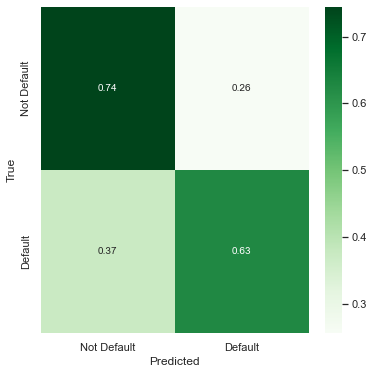

                          Model  Accuracy  Precision    Recall  F1 Score  \
0  LDA+PCA+RandomSampler (test)  0.719333   0.395709  0.626382  0.485015   

    ROC-AUC  
0  0.685287  


In [170]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LDA + PCA + RandomSampler was used
y_pred_LDA_test2 = best_LDA_2.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lda_test_r2 = test_performance(test_y, y_pred_LDA_test2, 'LDA+PCA+RandomSampler (test)')

#### (iv) LDA + PCA + SMOTE-ENN

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.52      0.66      4734
           1       0.29      0.75      0.42      1266

    accuracy                           0.57      6000
   macro avg       0.59      0.63      0.54      6000
weighted avg       0.76      0.57      0.61      6000

ROC AUC: 0.6343127361408946
Confusion Matrix:
[[2472 2262]
 [ 321  945]]


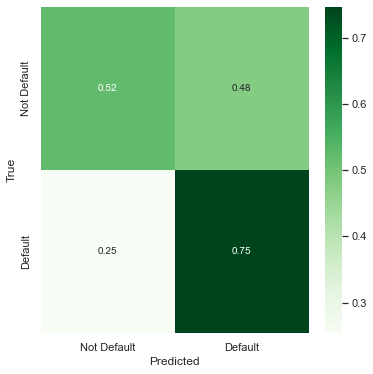

                      Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  LDA+PCA+SMOTE-ENN (test)    0.5695   0.294668  0.746445  0.422535  0.634313


In [171]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LDA + PCA +SMOTE-ENN was used
y_pred_LDA_test3 = best_LDA_3.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lda_test_r3 = test_performance(test_y, y_pred_LDA_test3, 'LDA+PCA+SMOTE-ENN (test)')

### (d) Naive Bayes (NB)

#### (i) NB + PCA 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4734
           1       0.53      0.50      0.51      1266

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.80      0.80      0.80      6000

ROC AUC: 0.6897466547332296
Confusion Matrix:
[[4171  563]
 [ 635  631]]


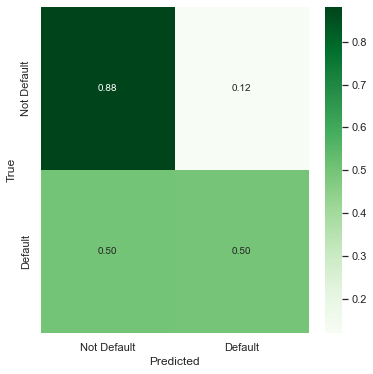

             Model  Accuracy  Precision   Recall  F1 Score   ROC-AUC
0  NB + PCA (test)  0.800333   0.528476  0.49842  0.513008  0.689747


In [172]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NB + PCA was used
y_pred_nb_test0 = nb_best_0.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nb_test_r0 = test_performance(test_y, y_pred_nb_test0, 'NB + PCA (test)')

#### (ii) NB + PCA + SMOTE

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.17      0.29      4734
           1       0.23      0.92      0.37      1266

    accuracy                           0.33      6000
   macro avg       0.56      0.55      0.33      6000
weighted avg       0.75      0.33      0.30      6000

ROC AUC: 0.546240566878305
Confusion Matrix:
[[ 808 3926]
 [  99 1167]]


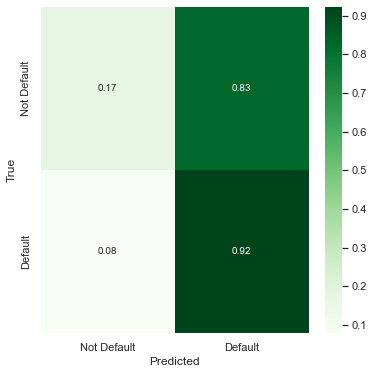

                     Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  NB + PCA + SMOTE (test)  0.329167   0.229138  0.921801  0.367039  0.546241


In [173]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NB + PCA + SMOTE was used
y_pred_nb_test1 = nb_best_1.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nb_test_r1 = test_performance(test_y, y_pred_nb_test1, 'NB + PCA + SMOTE (test)')

#### (iii) NB + PCA + RandomSampler

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.26      0.40      4734
           1       0.24      0.88      0.38      1266

    accuracy                           0.39      6000
   macro avg       0.56      0.57      0.39      6000
weighted avg       0.75      0.39      0.39      6000

ROC AUC: 0.5672667423518882
Confusion Matrix:
[[1209 3525]
 [ 153 1113]]


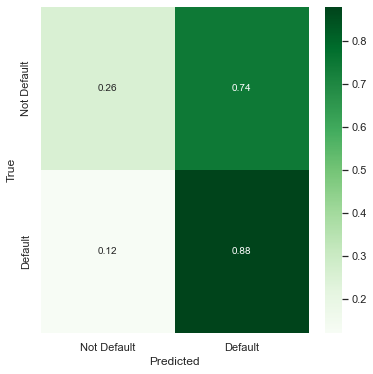

                             Model  Accuracy  Precision    Recall  F1 Score  \
0  NB + PCA + RandomSampler (test)     0.387   0.239974  0.879147  0.377033   

    ROC-AUC  
0  0.567267  


In [174]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NB + PCA + RandomSampler was used
y_pred_nb_test2 = nb_best_2.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nb_test_r2 = test_performance(test_y, y_pred_nb_test2, 'NB + PCA + RandomSampler (test)')

#### (iv) NB + PCA + SMOTE-ENN

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.15      0.26      4734
           1       0.23      0.93      0.36      1266

    accuracy                           0.31      6000
   macro avg       0.56      0.54      0.31      6000
weighted avg       0.75      0.31      0.28      6000

ROC AUC: 0.5411022811685958
Confusion Matrix:
[[ 707 4027]
 [  85 1181]]


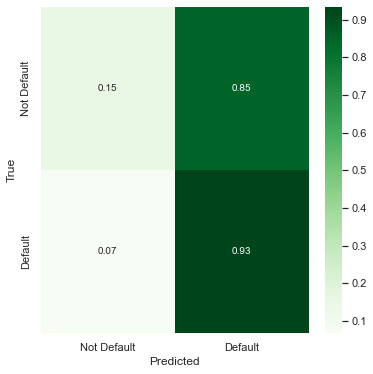

                         Model  Accuracy  Precision    Recall  F1 Score  \
0  NB + PCA + SMOTE-ENN (test)  0.314667   0.226767  0.932859  0.364844   

    ROC-AUC  
0  0.541102  


In [175]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for NB + PCA + SMOTE-ENN was used
y_pred_nb_test3 = nb_best_3.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
nb_test_r3 = test_performance(test_y, y_pred_nb_test3, 'NB + PCA + SMOTE-ENN (test)')

### (e) Logistic Regression (LR)

#### (i) LR + PCA

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      4734
           1       0.74      0.20      0.32      1266

    accuracy                           0.82      6000
   macro avg       0.78      0.59      0.61      6000
weighted avg       0.81      0.82      0.77      6000

ROC AUC: 0.5924956501020149
Confusion Matrix:
[[4645   89]
 [1008  258]]


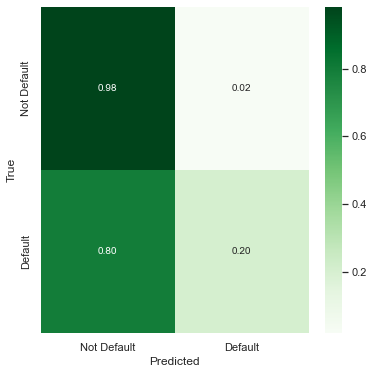

           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  LR+PCA (test)  0.817167   0.743516  0.203791  0.319901  0.592496


In [176]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LR + PCA was used
y_pred_lr_test0 = lr_best_0.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lr_test_r0 = test_performance(test_y, y_pred_lr_test0, 'LR+PCA (test)')

#### (ii) LR + PCA + SMOTE

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      4734
           1       0.38      0.63      0.47      1266

    accuracy                           0.70      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.70      0.73      6000

ROC AUC: 0.6765387826692857
Confusion Matrix:
[[3414 1320]
 [ 466  800]]


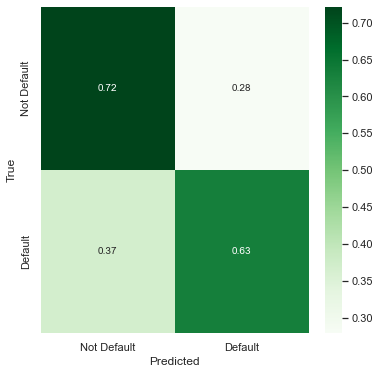

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  LR+PCA+SMOTE (test)  0.702333   0.377358  0.631912  0.472534  0.676539


In [177]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LR + PCA + SMOTE was used
y_pred_lr_test1 = lr_best_1.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lr_test_r1 = test_performance(test_y, y_pred_lr_test1, 'LR+PCA+SMOTE (test)')

#### (iii) LR + PCA + RandomSampler

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      4734
           1       0.40      0.62      0.48      1266

    accuracy                           0.72      6000
   macro avg       0.64      0.68      0.65      6000
weighted avg       0.78      0.72      0.74      6000

ROC AUC: 0.684005189843764
Confusion Matrix:
[[3552 1182]
 [ 484  782]]


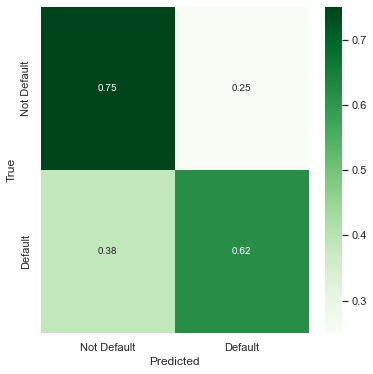

                         Model  Accuracy  Precision    Recall  F1 Score  \
0  LR+PCA+RandomSampler (test)  0.722333   0.398167  0.617694  0.484211   

    ROC-AUC  
0  0.684005  


In [178]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LR + PCA + RandomSampler was used
y_pred_lr_test2 = lr_best_2.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lr_test_r2 = test_performance(test_y, y_pred_lr_test2, 'LR+PCA+RandomSampler (test)')

#### (iv) LR + PCA + SMOTE-ENN

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.52      0.65      4734
           1       0.29      0.75      0.42      1266

    accuracy                           0.57      6000
   macro avg       0.59      0.63      0.54      6000
weighted avg       0.76      0.57      0.60      6000

ROC AUC: 0.6317778818950137
Confusion Matrix:
[[2448 2286]
 [ 321  945]]


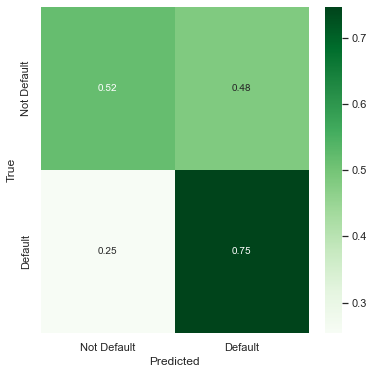

                     Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  LR+PCA+SMOTE-ENN (test)    0.5655   0.292479  0.746445   0.42028  0.631778


In [179]:
# Using the code developed from the model testing & validation, the test set was used to predict the outcome
# The code for LR + PCA + SMOTE-ENN was used
y_pred_lr_test3 = lr_best_3.predict(X_15d_test_std)

# Call the measuring metrics function to compute the performance of the training model
lr_test_r3 = test_performance(test_y, y_pred_lr_test3, 'LR+PCA+SMOTE-ENN (test)')

### - Result for test models -

### (i) Comparative Analysis (All Model for test data)

In [204]:
# Create a dataframe to store the results of each different combinations of techniques
final_rt_test = [knn_test_r0, knn_test_r1, knn_test_r2, knn_test_r3, nn_test_r0, nn_test_r1, nn_test_r2, nn_test_r3, lda_test_r0, lda_test_r1, lda_test_r2, lda_test_r3, nb_test_r0, nb_test_r1, nb_test_r2, nb_test_r3, lr_test_r0, lr_test_r1, lr_test_r2, lr_test_r3]
frame = pd.concat(final_rt_test)
frame

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,KNN+PCA (test),0.820333,0.678030,0.282780,0.399108,0.623435
0,KNN+PCA+SMOTE (test),0.744833,0.392013,0.379937,0.385880,0.611177
0,KNN+PCA+RandomSampler (test),0.787667,0.496965,0.517378,0.506966,0.688663
0,KNN+PCA+SMOTE-ENN (test),0.699333,0.370549,0.608215,0.460526,0.665958
0,NN+PCA (test),0.825000,0.671429,0.334123,0.446203,0.645198
0,NN+PCA+SMOTE (test),0.733500,0.402346,0.541864,0.461797,0.663306
0,NN+PCA+RandomSampler (test),0.717167,0.399721,0.678515,0.503075,0.703009
0,NN+PCA+SMOTE-ENN (test),0.675667,0.357860,0.676145,0.468015,0.675842
0,LDA+PCA (test),0.821167,0.741855,0.233807,0.355556,0.606025
0,LDA+PCA+SMOTE (test),0.704000,0.378340,0.626382,0.471743,0.675570


### (ii) ROC Curve  (Test Data)

#### (a) PCA

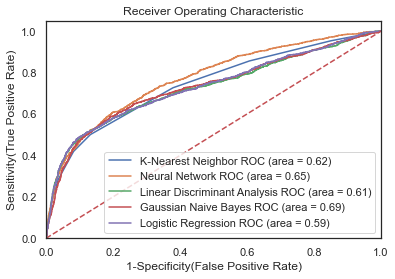

In [200]:
# Plotting the ROC Curve of different models for PCA Technique 
roc_curve_PCA(X_15d_test_std,test_y)

#### (b) PCA + SMOTE

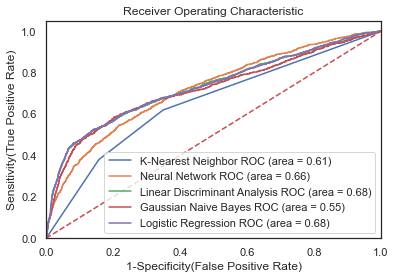

In [201]:
# Plotting the ROC Curve of different models for PCA + SMOTE Technique 
roc_curve_PCA_SMOTE(X_15d_test_std,test_y)

#### (c) PCA + RandomSampler 

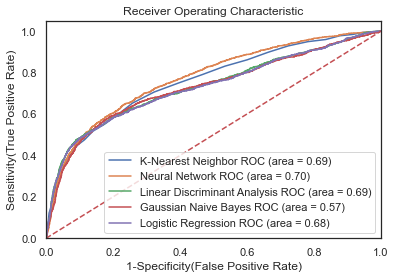

In [202]:
# Plotting the ROC Curve of different models for PCA + RandomSampler Technique 
roc_curve_PCA_RS(X_15d_test_std,test_y)

#### (d) PCA + SMOTE-ENN

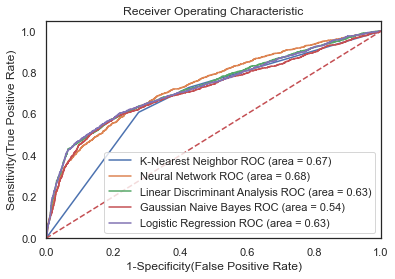

In [203]:
# Plotting the ROC Curve of different models for PCA + SMOTE-ENN Technique 
roc_curve_PCA_SMOTEENN(X_15d_test_std,test_y)

## 8. References

1. https://github.com/teresanan/credit-card-default-prediction/blob/master/Modeling/credit_card_default_part2_modeling.ipynb
2. https://github.com/sidneykung/cc_default_prediction/blob/master/final_notebook.ipynb
3. https://github.com/robertofranceschi/default-credit-card-prediction/blob/master/code.ipynb
4. https://github.com/robertofranceschi/default-credit-card-prediction
5. https://github.com/shinejeanG31/Default-of-Credit-Card-Clients-Prediction/blob/main/Default_of_credit_card_clients.ipynb
6. https://medium.com/swlh/predicting-credit-card-defaults-with-machine-learning-fcc8da2fdafb  
7. https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models  
8. https://www.kaggle.com/selener/prediction-of-credit-card-default  
9. https://www.kaggle.com/ainslie/credit-card-default-prediction-analysis 
10. https://www.kaggle.com/sid321axn/credit-card-default-a-comparative-study 
11. https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook/notebook  
12. https://www.kaggle.com/lucabasa/fantastic-trees-and-how-to-tune-them  
13. https://www.kaggle.com/somaktukai/credit-card-default-model-comparison  
14. http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html
15. https://github.com/KaushikJais/Credit-Card-Default/blob/master/Credit%20Card%20Default%20(Final%20Submission)%20(1).ipynb